# Graphene sheet on a ferrite substrate - isolator

In [14]:
from sympy import *
from Electromagnetics.VectorCalculus import *
from IPython.display import display, Math, Latex

from sympy.utilities.lambdify import lambdastr
from Electromagnetics import Misc

init_printing()

print_latex = True

x, y, z = symbols('x y z')
Ex1 = Symbol('E_{x1}')
Ey1 = Symbol('E_{y1}')
Ez1 = Symbol('E_{z1}')
Ex2 = Symbol('E_{x2}')
Ey2 = Symbol('E_{y2}')
Ez2 = Symbol('E_{z2}')
alpha_1, alpha_2 = symbols('\\alpha_1 \\alpha_2')
k, k1, k2 = symbols('k k_1 k_2')
omega = Symbol('\\omega', real=True)
eps_1, mu_1 = symbols('\\epsilon_{r1} \\mu_{r1}')
eps_2, mu_d2, mu_o2 = symbols('\\epsilon_{r2} \\mu_{rd2} \\mu_{ro2}')
eps_0, mu_0, eta_0, k_0 = symbols('\\epsilon_0 \\mu_0 \\eta_0 k_0', real=True, positive=True)
sigma = Symbol('\\sigma')

E1 = Matrix([[Ex1, Ey1, Ez1]])*exp(-I*k*z-alpha_1*y)       # upper region
E2 = Matrix([[Ex2, Ey2, Ez2]])*exp(-I*k*z+alpha_2*y)       # lower region

display(Math('E_1 = ' + latex(E1)))
display(Math('E_2 = ' + latex(E2)))
if print_latex:
    print('latex:\n E_1 = '+ latex(E1))
    print(' E_2 = '+ latex(E2))

mu_2_tens = Matrix([[1, 0, 0], [0, mu_d2, -mu_o2], [0, mu_o2, mu_d2]])
display(Math('\\mu_2 = ' + latex(mu_2_tens)))
if print_latex:
    print('latex:\n \\mu_2 = '+ latex(mu_2_tens))

mu_2_tens_inv = mu_2_tens.inv()
display(Math('\\mu_2^{-1} = ' + latex(mu_2_tens_inv)))
if print_latex:
    print('latex:\n \\mu_2^{-1} = '+ latex(mu_2_tens_inv))


H1 = -1/(I*omega*mu_0*mu_1)*curl_r(E1)
H2 = -1/(I*omega*mu_0)*mu_2_tens_inv*curl_r(E2).T
H2 = H2.T

display(Math('H_1 = ' + latex(H1)))
display(Math('H_2 = ' + latex(H2)))

H1 = Matrix([[H1[i].doit() for i in range(H1.cols)]])
H2 = Matrix([[H2[i].doit() for i in range(H2.cols)]])

display(Math('H_1 = ' + latex(H1.T)))
display(Math('H_2 = ' + latex(H2.T)))
if print_latex:
    print('latex:\n H_1 = '+ latex(H1.T))
    print('latex:\n H_2 = '+ latex(H2.T))

a_y = Matrix([[0, 1, 0]])

sigma_mat = Matrix([[sigma, 0, 0], [0, 0, 0], [0, 0, sigma]])
display(Math('\sigma = ' + latex(sigma_mat)))
if print_latex:
    print('latex:\n \\sigma = '+ latex(sigma_mat))

A = simplify((crossproduct(a_y, (H1-H2)) - (sigma_mat*E1.T).T).subs(y, 0)*exp(I*k*z))
A = A.T
display(Math('A = ' + latex(A)))
if print_latex:
    print('latex:\n A = '+ latex(A))

div_E1 = divergence_r(E1).doit()
Ey1_rep = solve(div_E1, Ey1)[0]
display(Math('E_{y1} = ' + latex(Ey1_rep)))
if print_latex:
    print('latex:\n E_{y1} ='+ latex(Ey1_rep))

div_E2 = divergence_r(E2).doit()
Ey2_rep = solve(div_E2, Ey2)[0]
display(Math('E_{y2} = ' + latex(Ey2_rep)))
if print_latex:
    print('latex:\n E_{y2} ='+ latex(Ey2_rep))

B = A.subs([(Ey1, Ey1_rep), (Ey2, Ey2_rep), (Ex2, Ex1), (Ez2, Ez1)])
display(Math('B = ' + latex(B)))
if print_latex:
    print('latex:\n B ='+ latex(B))

B_coeff = simplify(Matrix([[B[0].subs([(Ex1, 0), (Ez1, 1)]), B[0].subs([(Ex1, 1), (Ez1, 0)])], 
                  [B[2].subs([(Ex1, 0), (Ez1, 1)]), B[2].subs([(Ex1, 1), (Ez1, 0)])]]))

display(Math('B_\\text{coeff} = ' + latex(B_coeff)))
if print_latex:
    print('latex:\n B_\\text{coeff} = '+ latex(B_coeff))

AK1 = curl_r(curl_r(E1)) - omega**2*mu_0*mu_1*eps_0*eps_1*E1
AK1 = AK1.subs([(Ey1, Ey1_rep)])/exp(-I*k*z-alpha_1*y)   
AK1 = Matrix([[AK1[i].doit().simplify() for i in range(AK1.cols)]])
display(Math('AK1 = ' + latex(AK1.T)))
if print_latex:
    print('latex:\n AK1 = '+ latex(AK1.T))

#AK2 = curl_r(curl_r(E2)).T - omega**2*mu_0*mu_2_tens*eps_0*eps_2*E2.T
AK2 = curl_r((mu_2_tens_inv*curl_r(E2).T).T).T - omega**2*mu_0*eps_0*eps_2*E2.T
AK2 = AK2.T
AK2 = AK2.subs([(Ey2, Ey2_rep)])/exp(-I*k*z+alpha_2*y)   
AK2 = Matrix([[AK2[i].doit().simplify() for i in range(AK2.cols)]])
display(Math('AK2 = ' + latex(AK2.T)))
if print_latex:
    print('latex:\n AK2 = '+ latex(AK2.T))

##-------------------------------------------------
print('-'*50)
print('TE mode')

alpha_1_rep = sqrt(solve(AK1[0], alpha_1**2)[0])
display(Math('\\alpha_1 = ' + latex(alpha_1_rep)))
if print_latex:
    print('latex:\n \\alpha_1 = '+ latex(alpha_1_rep))
alpha_2_rep = sqrt(solve(AK2[0], alpha_2**2)[0])
display(Math('\\alpha_2 = ' + latex(alpha_2_rep)))
if print_latex:
    print('latex:\n \\alpha_2 = '+ latex(alpha_2_rep))


EQ = B_coeff[0,1].subs([(alpha_1, alpha_1_rep), (alpha_2, alpha_2_rep)]).simplify()
display(Math('EQ = ' + latex(EQ)))
print('latex form: \n', latex(EQ))

EQ_str = lambdastr(k, EQ).replace('\\', '').replace('{', '').replace('}', '')
print('EQ_str = \n', EQ_str)

EQ_str = Misc.replace_whole_word(EQ_str, 'I', '1j')
print('EQ_str = \n', EQ_str)

K = Symbol('K')
k0 = Symbol('k_0', real=True)
EQ = (EQ.subs(omega, k0/sqrt(mu_0*eps_0)).subs(k, K*k0)).simplify()
EQ = EQ.subs(abs(k0), k0).simplify()
display(Math('EQ = ' + latex(EQ)))

#k_TE = solve(EQ, K)
#display(Math('k_\\text{TE}/k_0 = ' + latex(k_TE)))


EQ_str = lambdastr(k, EQ).replace('\\', '').replace('{', '').replace('}', '')
print('EQ_str = \n', EQ_str)

EQ_str = Misc.replace_whole_word(EQ_str, 'I', '1j')
print('EQ_str = \n', EQ_str)

print('latex form: K=k/k_0\n', latex(EQ))

EQ = EQ.subs([(mu_o2, 0)]).simplify()
display(Math('EQ({}) = '.format(latex(mu_o2)+' = 0') + latex(EQ)))
EQ = EQ.subs([(mu_d2, mu_1), (eps_2, eps_1)])
display(Math('EQ({}) = '.format(latex(mu_o2)+' = 0') + latex(EQ)))


A_ = Wild('A_a')
B_ = Wild('B_b')

eq_arr_1 = B_coeff[0,1].match(A_*B_)[B_]
eq_arr_2 = AK1[0].match(A_*B_)[B_]
eq_arr_3 = AK2[0].match(A_*B_)[B_]
print('equation array:')
display(Math('Eq_1 : ' + latex(eq_arr_1)))
display(Math('Eq_2 : ' + latex(eq_arr_2)))
display(Math('Eq_3 : ' + latex(eq_arr_3)))

eq_arr_1 = eq_arr_1.subs([(omega, k_0/sqrt(mu_0*eps_0)), (k, k*k_0), (alpha_1, alpha_1*k_0), (alpha_2, alpha_2*k_0), (sigma, sigma/sqrt(mu_0/eps_0))]).subs(k_0, 1).simplify()
eq_arr_2 = eq_arr_2.subs([(omega, k_0/sqrt(mu_0*eps_0)), (k, k*k_0), (alpha_1, alpha_1*k_0), (alpha_2, alpha_2*k_0)]).subs(k_0, 1).simplify()
eq_arr_3 = eq_arr_3.subs([(omega, k_0/sqrt(mu_0*eps_0)), (k, k*k_0), (alpha_1, alpha_1*k_0), (alpha_2, alpha_2*k_0)]).subs(k_0, 1).simplify()
display(Math('Eq_1 : ' + latex(eq_arr_1)))
display(Math('Eq_2 : ' + latex(eq_arr_2)))
display(Math('Eq_3 : ' + latex(eq_arr_3)))


eq_1_str = lambdastr(k, eq_arr_1).replace('\\', '').replace('{', '').replace('}', '')
print('EQ_1_str = \n', eq_1_str)
eq_1_str = Misc.replace_whole_word(eq_1_str, 'I', '1j')
print('eq_1_str = \n', eq_1_str)

eq_2_str = lambdastr(k, eq_arr_2).replace('\\', '').replace('{', '').replace('}', '')
print('EQ_2_str = \n', eq_2_str)

eq_3_str = lambdastr(k, eq_arr_3).replace('\\', '').replace('{', '').replace('}', '')
print('EQ_3_str = \n', eq_3_str)


##------------------------------
print('-'*50)
print('TM mode')

alpha_1_rep = sqrt(solve(AK1[2], alpha_1**2)[0])
display(Math('\\alpha_1 = ' + latex(alpha_1_rep)))
if print_latex:
    print('latex:\n \\alpha_1 = '+ latex(alpha_1_rep))
alpha_2_rep = sqrt(solve(AK2[2], alpha_2**2)[0])
display(Math('\\alpha_2 = ' + latex(alpha_2_rep)))
if print_latex:
    print('latex:\n \\alpha_2 = '+ latex(alpha_2_rep))


EQ = B_coeff[1,0].subs([(alpha_1, alpha_1_rep), (alpha_2, alpha_2_rep)]).simplify()
display(Math('EQ = ' + latex(EQ)))
print('latex form: \n', latex(EQ))

EQ_str = lambdastr(k, EQ).replace('\\', '').replace('{', '').replace('}', '')
print('EQ_str = \n', EQ_str)

EQ_str = Misc.replace_whole_word(EQ_str, 'I', '1j')
print('EQ_str = \n', EQ_str)

K = Symbol('K')
k0 = Symbol('k_0', real=True)
EQ = (EQ.subs(omega, k0/sqrt(mu_0*eps_0)).subs(k, K*k0)).simplify()
EQ = EQ.subs(abs(k0), k0).simplify()
display(Math('EQ = ' + latex(EQ)))


EQ_str = lambdastr(k, EQ).replace('\\', '').replace('{', '').replace('}', '')
print('EQ_str = \n', EQ_str)

EQ_str = Misc.replace_whole_word(EQ_str, 'I', '1j')
print('EQ_str = \n', EQ_str)

print('latex form: K=k/k_0\n', latex(EQ))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

latex:
 E_1 = \left[\begin{matrix}E_{{x1}} e^{- \alpha_{1} y - i k z} & E_{{y1}} e^{- \alpha_{1} y - i k z} & E_{{z1}} e^{- \alpha_{1} y - i k z}\end{matrix}\right]
 E_2 = \left[\begin{matrix}E_{{x2}} e^{\alpha_{2} y - i k z} & E_{{y2}} e^{\alpha_{2} y - i k z} & E_{{z2}} e^{\alpha_{2} y - i k z}\end{matrix}\right]


<IPython.core.display.Math object>

latex:
 \mu_2 = \left[\begin{matrix}1 & 0 & 0\\0 & \mu_{{rd2}} & - \mu_{{ro2}}\\0 & \mu_{{ro2}} & \mu_{{rd2}}\end{matrix}\right]


<IPython.core.display.Math object>

latex:
 \mu_2^{-1} = \left[\begin{matrix}1 & 0 & 0\\0 & \frac{1}{\mu_{{rd2}}} - \frac{\mu_{{ro2}}^{2}}{\mu_{{rd2}}^{2} \left(\mu_{{rd2}} + \frac{\mu_{{ro2}}^{2}}{\mu_{{rd2}}}\right)} & \frac{\mu_{{ro2}}}{\mu_{{rd2}} \left(\mu_{{rd2}} + \frac{\mu_{{ro2}}^{2}}{\mu_{{rd2}}}\right)}\\0 & - \frac{\mu_{{ro2}}}{\mu_{{rd2}} \left(\mu_{{rd2}} + \frac{\mu_{{ro2}}^{2}}{\mu_{{rd2}}}\right)} & \frac{1}{\mu_{{rd2}} + \frac{\mu_{{ro2}}^{2}}{\mu_{{rd2}}}}\end{matrix}\right]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

latex:
 H_1 = \left[\begin{matrix}\frac{i}{\mu_{0} \mu_{{r1}} \omega} \left(i E_{{y1}} k e^{- \alpha_{1} y - i k z} - E_{{z1}} \alpha_{1} e^{- \alpha_{1} y - i k z}\right)\\\frac{E_{{x1}} k}{\mu_{0} \mu_{{r1}} \omega} e^{- \alpha_{1} y - i k z}\\\frac{i E_{{x1}} \alpha_{1}}{\mu_{0} \mu_{{r1}} \omega} e^{- \alpha_{1} y - i k z}\end{matrix}\right]
latex:
 H_2 = \left[\begin{matrix}\frac{i}{\mu_{0} \omega} \left(i E_{{y2}} k e^{\alpha_{2} y - i k z} + E_{{z2}} \alpha_{2} e^{\alpha_{2} y - i k z}\right)\\- \frac{i E_{{x2}} \alpha_{2} \mu_{{ro2}} e^{\alpha_{2} y - i k z}}{\mu_{0} \mu_{{rd2}} \omega \left(\mu_{{rd2}} + \frac{\mu_{{ro2}}^{2}}{\mu_{{rd2}}}\right)} + \frac{E_{{x2}} k}{\mu_{0} \omega} \left(\frac{1}{\mu_{{rd2}}} - \frac{\mu_{{ro2}}^{2}}{\mu_{{rd2}}^{2} \left(\mu_{{rd2}} + \frac{\mu_{{ro2}}^{2}}{\mu_{{rd2}}}\right)}\right) e^{\alpha_{2} y - i k z}\\- \frac{i E_{{x2}} \alpha_{2} e^{\alpha_{2} y - i k z}}{\mu_{0} \omega \left(\mu_{{rd2}} + \frac{\mu_{{ro2}}^{2}}{\mu_{{rd2}}}\right)

<IPython.core.display.Math object>

latex:
 \sigma = \left[\begin{matrix}\sigma & 0 & 0\\0 & 0 & 0\\0 & 0 & \sigma\end{matrix}\right]


<IPython.core.display.Math object>

latex:
 A = \left[\begin{matrix}\frac{1}{\mu_{0} \mu_{{r1}} \omega \left(\mu_{{rd2}}^{2} + \mu_{{ro2}}^{2}\right)} \left(i E_{{x1}} \alpha_{1} \left(\mu_{{rd2}}^{2} + \mu_{{ro2}}^{2}\right) - E_{{x1}} \mu_{0} \mu_{{r1}} \omega \sigma \left(\mu_{{rd2}}^{2} + \mu_{{ro2}}^{2}\right) + E_{{x2}} \mu_{{r1}} \left(i \alpha_{2} \mu_{{rd2}} + \mu_{{ro2}} k\right)\right)\\0\\\frac{1}{\mu_{0} \mu_{{r1}} \omega} \left(E_{{y1}} k - E_{{y2}} \mu_{{r1}} k + i E_{{z1}} \alpha_{1} - E_{{z1}} \mu_{0} \mu_{{r1}} \omega \sigma + i E_{{z2}} \alpha_{2} \mu_{{r1}}\right)\end{matrix}\right]


<IPython.core.display.Math object>

latex:
 E_{y1} =- \frac{i E_{{z1}}}{\alpha_{1}} k


<IPython.core.display.Math object>

latex:
 E_{y2} =\frac{i E_{{z2}}}{\alpha_{2}} k


<IPython.core.display.Math object>

latex:
 B =\left[\begin{matrix}\frac{1}{\mu_{0} \mu_{{r1}} \omega \left(\mu_{{rd2}}^{2} + \mu_{{ro2}}^{2}\right)} \left(i E_{{x1}} \alpha_{1} \left(\mu_{{rd2}}^{2} + \mu_{{ro2}}^{2}\right) - E_{{x1}} \mu_{0} \mu_{{r1}} \omega \sigma \left(\mu_{{rd2}}^{2} + \mu_{{ro2}}^{2}\right) + E_{{x1}} \mu_{{r1}} \left(i \alpha_{2} \mu_{{rd2}} + \mu_{{ro2}} k\right)\right)\\0\\\frac{1}{\mu_{0} \mu_{{r1}} \omega} \left(i E_{{z1}} \alpha_{1} + i E_{{z1}} \alpha_{2} \mu_{{r1}} - E_{{z1}} \mu_{0} \mu_{{r1}} \omega \sigma - \frac{i E_{{z1}}}{\alpha_{2}} \mu_{{r1}} k^{2} - \frac{i E_{{z1}}}{\alpha_{1}} k^{2}\right)\end{matrix}\right]


<IPython.core.display.Math object>

latex:
 B_\text{coeff} = \left[\begin{matrix}0 & \frac{1}{\mu_{0} \mu_{{r1}} \omega \left(\mu_{{rd2}}^{2} + \mu_{{ro2}}^{2}\right)} \left(i \alpha_{1} \left(\mu_{{rd2}}^{2} + \mu_{{ro2}}^{2}\right) - \mu_{0} \mu_{{r1}} \omega \sigma \left(\mu_{{rd2}}^{2} + \mu_{{ro2}}^{2}\right) + \mu_{{r1}} \left(i \alpha_{2} \mu_{{rd2}} + \mu_{{ro2}} k\right)\right)\\\frac{i \alpha_{1}}{\mu_{0} \mu_{{r1}} \omega} + \frac{i \alpha_{2}}{\mu_{0} \omega} - \sigma - \frac{i k^{2}}{\alpha_{2} \mu_{0} \omega} - \frac{i k^{2}}{\alpha_{1} \mu_{0} \mu_{{r1}} \omega} & 0\end{matrix}\right]


<IPython.core.display.Math object>

latex:
 AK1 = \left[\begin{matrix}E_{{x1}} \left(- \alpha_{1}^{2} - \epsilon_{0} \epsilon_{{r1}} \mu_{0} \mu_{{r1}} \omega^{2} + k^{2}\right)\\\frac{i E_{{z1}}}{\alpha_{1}} k \left(\alpha_{1}^{2} + \epsilon_{0} \epsilon_{{r1}} \mu_{0} \mu_{{r1}} \omega^{2} - k^{2}\right)\\E_{{z1}} \left(- \alpha_{1}^{2} - \epsilon_{0} \epsilon_{{r1}} \mu_{0} \mu_{{r1}} \omega^{2} + k^{2}\right)\end{matrix}\right]


<IPython.core.display.Math object>

latex:
 AK2 = \left[\begin{matrix}\frac{E_{{x2}}}{\mu_{{rd2}}^{2} + \mu_{{ro2}}^{2}} \left(- \alpha_{2}^{2} \mu_{{rd2}} - \epsilon_{0} \epsilon_{{r2}} \mu_{0} \mu_{{rd2}}^{2} \omega^{2} - \epsilon_{0} \epsilon_{{r2}} \mu_{0} \mu_{{ro2}}^{2} \omega^{2} + \mu_{{rd2}} k^{2}\right)\\\frac{i E_{{z2}}}{\alpha_{2}} k \left(- \alpha_{2}^{2} - \epsilon_{0} \epsilon_{{r2}} \mu_{0} \omega^{2} + k^{2}\right)\\E_{{z2}} \left(- \alpha_{2}^{2} - \epsilon_{0} \epsilon_{{r2}} \mu_{0} \omega^{2} + k^{2}\right)\end{matrix}\right]
--------------------------------------------------
TE mode


<IPython.core.display.Math object>

latex:
 \alpha_1 = \sqrt{- \epsilon_{0} \epsilon_{{r1}} \mu_{0} \mu_{{r1}} \omega^{2} + k^{2}}


<IPython.core.display.Math object>

latex:
 \alpha_2 = \sqrt{- \epsilon_{0} \epsilon_{{r2}} \mu_{0} \mu_{{rd2}} \omega^{2} - \frac{\epsilon_{0} \epsilon_{{r2}}}{\mu_{{rd2}}} \mu_{0} \mu_{{ro2}}^{2} \omega^{2} + k^{2}}


<IPython.core.display.Math object>

latex form: 
 \frac{1}{\mu_{0} \mu_{{r1}} \omega \left(\mu_{{rd2}}^{2} + \mu_{{ro2}}^{2}\right)} \left(- \mu_{0} \mu_{{r1}} \omega \sigma \left(\mu_{{rd2}}^{2} + \mu_{{ro2}}^{2}\right) + \mu_{{r1}} \left(i \mu_{{rd2}} \sqrt{\frac{1}{\mu_{{rd2}}} \left(- \epsilon_{0} \epsilon_{{r2}} \mu_{0} \mu_{{ro2}}^{2} \omega^{2} + \mu_{{rd2}} \left(- \epsilon_{0} \epsilon_{{r2}} \mu_{0} \mu_{{rd2}} \omega^{2} + k^{2}\right)\right)} + \mu_{{ro2}} k\right) + i \left(\mu_{{rd2}}^{2} + \mu_{{ro2}}^{2}\right) \sqrt{- \epsilon_{0} \epsilon_{{r1}} \mu_{0} \mu_{{r1}} \omega^{2} + k^{2}}\right)
EQ_str = 
 lambda k: ((-mu_0*mu_r1*omega*sigma*(mu_rd2**2 + mu_ro2**2) + mu_r1*(I*mu_rd2*sqrt((-epsilon_0*epsilon_r2*mu_0*mu_ro2**2*omega**2 + mu_rd2*(-epsilon_0*epsilon_r2*mu_0*mu_rd2*omega**2 + k**2))/mu_rd2) + mu_ro2*k) + I*(mu_rd2**2 + mu_ro2**2)*sqrt(-epsilon_0*epsilon_r1*mu_0*mu_r1*omega**2 + k**2))/(mu_0*mu_r1*omega*(mu_rd2**2 + mu_ro2**2)))
EQ_str = 
 lambda k: ((-mu_0*mu_r1*omega*sigma*(mu_rd2**2 + mu_ro2**2

<IPython.core.display.Math object>

EQ_str = 
 lambda k: ((sqrt(epsilon_0)*(mu_r1*(K*mu_ro2 + I*mu_rd2*sqrt((-epsilon_r2*mu_ro2**2 + mu_rd2*(K**2 - epsilon_r2*mu_rd2))/mu_rd2)) + I*sqrt(K**2 - epsilon_r1*mu_r1)*(mu_rd2**2 + mu_ro2**2)) - sqrt(mu_0)*mu_r1*sigma*(mu_rd2**2 + mu_ro2**2))/(sqrt(mu_0)*mu_r1*(mu_rd2**2 + mu_ro2**2)))
EQ_str = 
 lambda k: ((sqrt(epsilon_0)*(mu_r1*(K*mu_ro2 + 1j*mu_rd2*sqrt((-epsilon_r2*mu_ro2**2 + mu_rd2*(K**2 - epsilon_r2*mu_rd2))/mu_rd2)) + 1j*sqrt(K**2 - epsilon_r1*mu_r1)*(mu_rd2**2 + mu_ro2**2)) - sqrt(mu_0)*mu_r1*sigma*(mu_rd2**2 + mu_ro2**2))/(sqrt(mu_0)*mu_r1*(mu_rd2**2 + mu_ro2**2)))
latex form: K=k/k_0
 \frac{1}{\sqrt{\mu_{0}} \mu_{{r1}} \left(\mu_{{rd2}}^{2} + \mu_{{ro2}}^{2}\right)} \left(\sqrt{\epsilon_{0}} \left(\mu_{{r1}} \left(K \mu_{{ro2}} + i \mu_{{rd2}} \sqrt{\frac{1}{\mu_{{rd2}}} \left(- \epsilon_{{r2}} \mu_{{ro2}}^{2} + \mu_{{rd2}} \left(K^{2} - \epsilon_{{r2}} \mu_{{rd2}}\right)\right)}\right) + i \sqrt{K^{2} - \epsilon_{{r1}} \mu_{{r1}}} \left(\mu_{{rd2}}^{2} + \mu_{{ro2}}

<IPython.core.display.Math object>

<IPython.core.display.Math object>

equation array:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

EQ_1_str = 
 lambda k: (I*alpha_1*(mu_rd2**2 + mu_ro2**2) - mu_r1*sigma*(mu_rd2**2 + mu_ro2**2) + mu_r1*(I*alpha_2*mu_rd2 + mu_ro2*k))
eq_1_str = 
 lambda k: (1j*alpha_1*(mu_rd2**2 + mu_ro2**2) - mu_r1*sigma*(mu_rd2**2 + mu_ro2**2) + mu_r1*(1j*alpha_2*mu_rd2 + mu_ro2*k))
EQ_2_str = 
 lambda k: (alpha_1**2 + epsilon_r1*mu_r1 - k**2)
EQ_3_str = 
 lambda k: (alpha_2**2*mu_rd2 + epsilon_r2*mu_rd2**2 + epsilon_r2*mu_ro2**2 - mu_rd2*k**2)
--------------------------------------------------
TM mode


<IPython.core.display.Math object>

latex:
 \alpha_1 = \sqrt{- \epsilon_{0} \epsilon_{{r1}} \mu_{0} \mu_{{r1}} \omega^{2} + k^{2}}


<IPython.core.display.Math object>

latex:
 \alpha_2 = \sqrt{- \epsilon_{0} \epsilon_{{r2}} \mu_{0} \omega^{2} + k^{2}}


<IPython.core.display.Math object>

latex form: 
 - \frac{i \epsilon_{0} \epsilon_{{r1}} \omega}{\sqrt{- \epsilon_{0} \epsilon_{{r1}} \mu_{0} \mu_{{r1}} \omega^{2} + k^{2}}} - \frac{i \epsilon_{0} \epsilon_{{r2}} \omega}{\sqrt{- \epsilon_{0} \epsilon_{{r2}} \mu_{0} \omega^{2} + k^{2}}} - \sigma
EQ_str = 
 lambda k: (-I*epsilon_0*epsilon_r1*omega/sqrt(-epsilon_0*epsilon_r1*mu_0*mu_r1*omega**2 + k**2) - I*epsilon_0*epsilon_r2*omega/sqrt(-epsilon_0*epsilon_r2*mu_0*omega**2 + k**2) - sigma)
EQ_str = 
 lambda k: (-1j*epsilon_0*epsilon_r1*omega/sqrt(-epsilon_0*epsilon_r1*mu_0*mu_r1*omega**2 + k**2) - 1j*epsilon_0*epsilon_r2*omega/sqrt(-epsilon_0*epsilon_r2*mu_0*omega**2 + k**2) - sigma)


<IPython.core.display.Math object>

EQ_str = 
 lambda k: (-I*sqrt(epsilon_0)*epsilon_r1/(sqrt(mu_0)*sqrt(K**2 - epsilon_r1*mu_r1)) - I*sqrt(epsilon_0)*epsilon_r2/(sqrt(mu_0)*sqrt(K**2 - epsilon_r2)) - sigma)
EQ_str = 
 lambda k: (-1j*sqrt(epsilon_0)*epsilon_r1/(sqrt(mu_0)*sqrt(K**2 - epsilon_r1*mu_r1)) - 1j*sqrt(epsilon_0)*epsilon_r2/(sqrt(mu_0)*sqrt(K**2 - epsilon_r2)) - sigma)
latex form: K=k/k_0
 - \frac{i \sqrt{\epsilon_{0}} \epsilon_{{r1}}}{\sqrt{\mu_{0}} \sqrt{K^{2} - \epsilon_{{r1}} \mu_{{r1}}}} - \frac{i \sqrt{\epsilon_{0}} \epsilon_{{r2}}}{\sqrt{\mu_{0}} \sqrt{K^{2} - \epsilon_{{r2}}}} - \sigma


### Graphene sheet with ferrite superstrate and substrate

In [1]:
from sympy import *
from Electromagnetics.VectorCalculus import *
from IPython.display import display, Math, Latex

from sympy.utilities.lambdify import lambdastr
from Electromagnetics import Misc

print_latex = True

x, y, z = symbols('x y z')
Ex1 = Symbol('E_{x1}')
Ey1 = Symbol('E_{y1}')
Ez1 = Symbol('E_{z1}')
Ex2 = Symbol('E_{x2}')
Ey2 = Symbol('E_{y2}')
Ez2 = Symbol('E_{z2}')
alpha_1, alpha_2 = symbols('\\alpha_1 \\alpha_2')
k, k1, k2 = symbols('k k_1 k_2')
omega = Symbol('\\omega')
eps_1, mu_d1, mu_o1 = symbols('\\epsilon_{r1} \\mu_{rd1} \\mu_{ro1}')
eps_2, mu_d2, mu_o2 = symbols('\\epsilon_{r2} \\mu_{rd2} \\mu_{ro2}')
eps_0, mu_0, eta_0, k_0 = symbols('\\epsilon_0 \\mu_0 \\eta_0 k_0', real=True, positive=True)
sigma = Symbol('\\sigma')

E1 = Matrix([[Ex1, Ey1, Ez1]])*exp(-I*k*z-alpha_1*y)       # upper region
E2 = Matrix([[Ex2, Ey2, Ez2]])*exp(-I*k*z+alpha_2*y)       # lower region

display(Math('E_1 = ' + latex(E1)))
display(Math('E_2 = ' + latex(E2)))

mu_1_tens = Matrix([[1, 0, 0], [0, mu_d1, -mu_o1], [0, mu_o1, mu_d1]])
display(Math('\\mu_1 = ' + latex(mu_1_tens)))
if print_latex:
    print('latex:\n \\mu_1 = '+ latex(mu_1_tens))
mu_2_tens = Matrix([[1, 0, 0], [0, mu_d2, -mu_o2], [0, mu_o2, mu_d2]])
display(Math('\\mu_2 = ' + latex(mu_2_tens)))
if print_latex:
    print('latex:\n \\mu_2 = '+ latex(mu_2_tens))

mu_1_tens_inv = mu_1_tens.inv()
display(Math('\\mu_1^{-1} = ' + latex(mu_1_tens_inv)))
mu_2_tens_inv = mu_2_tens.inv()
display(Math('\\mu_2^{-1} = ' + latex(mu_2_tens_inv)))


H1 = -1/(I*omega*mu_0)*mu_1_tens_inv*curl_r(E1).T
H1 = H1.T
H2 = -1/(I*omega*mu_0)*mu_2_tens_inv*curl_r(E2).T
H2 = H2.T

display(Math('H_1 = ' + latex(H1)))
display(Math('H_2 = ' + latex(H2)))


H1 = Matrix([[H1[i].doit() for i in range(H1.cols)]])
H2 = Matrix([[H2[i].doit() for i in range(H2.cols)]])

display(Math('H_1 = ' + latex(H1.T)))
display(Math('H_2 = ' + latex(H2.T)))

a_y = Matrix([[0, 1, 0]])

sigma_mat = Matrix([[sigma, 0, 0], [0, 0, 0], [0, 0, sigma]])
display(Math('\sigma = ' + latex(sigma_mat)))

A = simplify((crossproduct(a_y, (H1-H2)) - (sigma_mat*E1.T).T).subs(y, 0)*exp(I*k*z))
A = A.T
display(Math('A = ' + latex(A)))
if print_latex:
    print('latex:\n '+ latex(A))

div_E1 = divergence_r(E1).doit()
Ey1_rep = solve(div_E1, Ey1)[0]
display(Math('E_{y1} = ' + latex(Ey1_rep)))

div_E2 = divergence_r(E2).doit()
Ey2_rep = solve(div_E2, Ey2)[0]
display(Math('E_{y2} = ' + latex(Ey2_rep)))

B = A.subs([(Ey1, Ey1_rep), (Ey2, Ey2_rep), (Ex2, Ex1), (Ez2, Ez1)])
display(Math('B = ' + latex(B)))

B_coeff = simplify(Matrix([[B[0].subs([(Ex1, 0), (Ez1, 1)]), B[0].subs([(Ex1, 1), (Ez1, 0)])], 
                  [B[2].subs([(Ex1, 0), (Ez1, 1)]), B[2].subs([(Ex1, 1), (Ez1, 0)])]]))

display(Math('B_\\text{coeff} = ' + latex(B_coeff)))
if print_latex:
    print('latex:\n '+ latex(B_coeff))

AK1 = curl_r((mu_1_tens_inv*curl_r(E1).T).T).T - omega**2*mu_0*eps_0*eps_1*E1.T
AK1 = AK1.T
AK1 = AK1.subs([(Ey1, Ey1_rep)])/exp(-I*k*z-alpha_1*y)   
AK1 = Matrix([[AK1[i].doit().simplify() for i in range(AK1.cols)]])
display(Math('AK1 = ' + latex(AK1.T)))
if print_latex:
    print('latex:\n '+ latex(AK1.T))

AK2 = curl_r((mu_2_tens_inv*curl_r(E2).T).T).T - omega**2*mu_0*eps_0*eps_2*E2.T
AK2 = AK2.T
AK2 = AK2.subs([(Ey2, Ey2_rep)])/exp(-I*k*z+alpha_2*y)   
AK2 = Matrix([[AK2[i].doit().simplify() for i in range(AK2.cols)]])
display(Math('AK2 = ' + latex(AK2.T)))
if print_latex:
    print('latex:\n '+ latex(AK2.T))


alpha_1_rep = sqrt(solve(AK1[0], alpha_1**2)[0])
display(Math('\\alpha_1 = ' + latex(alpha_1_rep)))
if print_latex:
    print('latex:\n '+ latex(alpha_1_rep))
alpha_2_rep = sqrt(solve(AK2[0], alpha_2**2)[0])
display(Math('\\alpha_2 = ' + latex(alpha_2_rep)))
if print_latex:
    print('latex:\n '+ latex(alpha_2_rep))


EQ = B_coeff[0,1].subs([(alpha_1, alpha_1_rep), (alpha_2, alpha_2_rep)]).simplify()
display(Math('EQ = ' + latex(EQ)))
if print_latex:
    print('latex:\n '+ latex(EQ))

EQ_str = lambdastr(k, EQ).replace('\\', '').replace('{', '').replace('}', '')
print('EQ_str = \n', EQ_str)

EQ_str = Misc.replace_whole_word(EQ_str, 'I', '1j')
print('EQ_str = \n', EQ_str)

A_ = Wild('A_a')
B_ = Wild('B_b')

eq_arr_1 = B_coeff[0,1].match(A_*B_)[B_]
eq_arr_2 = AK1[0].match(A_*B_)[B_]
eq_arr_3 = AK2[0].match(A_*B_)[B_]
print('equation array:')
display(Math('Eq_1 : ' + latex(eq_arr_1)))
display(Math('Eq_2 : ' + latex(eq_arr_2)))
display(Math('Eq_3 : ' + latex(eq_arr_3)))

eq_arr_1 = eq_arr_1.subs([(omega, k_0/sqrt(mu_0*eps_0)), (k, k*k_0), (alpha_1, alpha_1*k_0), (alpha_2, alpha_2*k_0), (sigma, sigma/sqrt(mu_0/eps_0))]).subs(k_0, 1).simplify()
eq_arr_2 = eq_arr_2.subs([(omega, k_0/sqrt(mu_0*eps_0)), (k, k*k_0), (alpha_1, alpha_1*k_0), (alpha_2, alpha_2*k_0)]).subs(k_0, 1).simplify()
eq_arr_3 = eq_arr_3.subs([(omega, k_0/sqrt(mu_0*eps_0)), (k, k*k_0), (alpha_1, alpha_1*k_0), (alpha_2, alpha_2*k_0)]).subs(k_0, 1).simplify()
display(Math('Eq_1 : ' + latex(eq_arr_1)))
display(Math('Eq_2 : ' + latex(eq_arr_2)))
display(Math('Eq_3 : ' + latex(eq_arr_3)))
if print_latex:
    print('latex eq_arr_1:\n '+ latex(eq_arr_1))
    print('latex eq_arr_2:\n '+ latex(eq_arr_2))
    print('latex eq_arr_3:\n '+ latex(eq_arr_3))


eq_1_str = lambdastr(k, eq_arr_1).replace('\\', '').replace('{', '').replace('}', '')
print('EQ_1_str = \n', eq_1_str)
eq_1_str = Misc.replace_whole_word(eq_1_str, 'I', '1j')
print('eq_1_str = \n', eq_1_str)

eq_2_str = lambdastr(k, eq_arr_2).replace('\\', '').replace('{', '').replace('}', '')
print('EQ_2_str = \n', eq_2_str)

eq_3_str = lambdastr(k, eq_arr_3).replace('\\', '').replace('{', '').replace('}', '')
print('EQ_3_str = \n', eq_3_str)

##------------------------------
print('-'*50)
print('TM mode')

alpha_1_rep = sqrt(solve(AK1[2], alpha_1**2)[0])
display(Math('\\alpha_1 = ' + latex(alpha_1_rep)))
if print_latex:
    print('latex:\n \\alpha_1 = '+ latex(alpha_1_rep))
alpha_2_rep = sqrt(solve(AK2[2], alpha_2**2)[0])
display(Math('\\alpha_2 = ' + latex(alpha_2_rep)))
if print_latex:
    print('latex:\n \\alpha_2 = '+ latex(alpha_2_rep))

EQ = B_coeff[1,0]
display(Math('EQ = ' + latex(EQ)))
EQ = EQ.subs([(alpha_1, alpha_1_rep), (alpha_2, alpha_2_rep)]).simplify()
display(Math('EQ = ' + latex(EQ)))
print('latex form: \n', latex(EQ))

EQ_str = lambdastr(k, EQ).replace('\\', '').replace('{', '').replace('}', '')
print('EQ_str = \n', EQ_str)

EQ_str = Misc.replace_whole_word(EQ_str, 'I', '1j')
print('EQ_str = \n', EQ_str)

K = Symbol('K')
k0 = Symbol('k_0', real=True)
EQ = (EQ.subs(omega, k0/sqrt(mu_0*eps_0)).subs(k, K*k0)).simplify()
EQ = EQ.subs(abs(k0), k0).simplify()
display(Math('EQ = ' + latex(EQ)))


EQ_str = lambdastr(k, EQ).replace('\\', '').replace('{', '').replace('}', '')
print('EQ_str = \n', EQ_str)

EQ_str = Misc.replace_whole_word(EQ_str, 'I', '1j')
print('EQ_str = \n', EQ_str)

print('latex form: K=k/k_0\n', latex(EQ))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

latex:
 \mu_1 = \left[\begin{matrix}1 & 0 & 0\\0 & \mu_{{rd1}} & - \mu_{{ro1}}\\0 & \mu_{{ro1}} & \mu_{{rd1}}\end{matrix}\right]


<IPython.core.display.Math object>

latex:
 \mu_2 = \left[\begin{matrix}1 & 0 & 0\\0 & \mu_{{rd2}} & - \mu_{{ro2}}\\0 & \mu_{{ro2}} & \mu_{{rd2}}\end{matrix}\right]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

latex:
 \left[\begin{matrix}\frac{1}{\mu_{0} \omega \left(\mu_{{rd1}}^{2} + \mu_{{ro1}}^{2}\right) \left(\mu_{{rd2}}^{2} + \mu_{{ro2}}^{2}\right)} \left(- E_{{x1}} \mu_{0} \omega \sigma \left(\mu_{{rd1}}^{2} + \mu_{{ro1}}^{2}\right) \left(\mu_{{rd2}}^{2} + \mu_{{ro2}}^{2}\right) + E_{{x1}} \left(\mu_{{rd2}}^{2} + \mu_{{ro2}}^{2}\right) \left(i \alpha_{1} \mu_{{rd1}} - \mu_{{ro1}} k\right) + E_{{x2}} \left(\mu_{{rd1}}^{2} + \mu_{{ro1}}^{2}\right) \left(i \alpha_{2} \mu_{{rd2}} + \mu_{{ro2}} k\right)\right)\\0\\\frac{1}{\mu_{0} \omega} \left(E_{{y1}} k - E_{{y2}} k + i E_{{z1}} \alpha_{1} - E_{{z1}} \mu_{0} \omega \sigma + i E_{{z2}} \alpha_{2}\right)\end{matrix}\right]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

latex:
 \left[\begin{matrix}0 & \frac{1}{\mu_{0} \omega \left(\mu_{{rd1}}^{2} + \mu_{{ro1}}^{2}\right) \left(\mu_{{rd2}}^{2} + \mu_{{ro2}}^{2}\right)} \left(- \mu_{0} \omega \sigma \left(\mu_{{rd1}}^{2} + \mu_{{ro1}}^{2}\right) \left(\mu_{{rd2}}^{2} + \mu_{{ro2}}^{2}\right) + \left(\mu_{{rd1}}^{2} + \mu_{{ro1}}^{2}\right) \left(i \alpha_{2} \mu_{{rd2}} + \mu_{{ro2}} k\right) + \left(\mu_{{rd2}}^{2} + \mu_{{ro2}}^{2}\right) \left(i \alpha_{1} \mu_{{rd1}} - \mu_{{ro1}} k\right)\right)\\\frac{i \alpha_{1}}{\mu_{0} \omega} + \frac{i \alpha_{2}}{\mu_{0} \omega} - \sigma - \frac{i k^{2}}{\alpha_{2} \mu_{0} \omega} - \frac{i k^{2}}{\alpha_{1} \mu_{0} \omega} & 0\end{matrix}\right]


<IPython.core.display.Math object>

latex:
 \left[\begin{matrix}\frac{E_{{x1}}}{\mu_{{rd1}}^{2} + \mu_{{ro1}}^{2}} \left(- \alpha_{1}^{2} \mu_{{rd1}} - \epsilon_{0} \epsilon_{{r1}} \mu_{0} \mu_{{rd1}}^{2} \omega^{2} - \epsilon_{0} \epsilon_{{r1}} \mu_{0} \mu_{{ro1}}^{2} \omega^{2} + \mu_{{rd1}} k^{2}\right)\\\frac{i E_{{z1}}}{\alpha_{1}} k \left(\alpha_{1}^{2} + \epsilon_{0} \epsilon_{{r1}} \mu_{0} \omega^{2} - k^{2}\right)\\E_{{z1}} \left(- \alpha_{1}^{2} - \epsilon_{0} \epsilon_{{r1}} \mu_{0} \omega^{2} + k^{2}\right)\end{matrix}\right]


<IPython.core.display.Math object>

latex:
 \left[\begin{matrix}\frac{E_{{x2}}}{\mu_{{rd2}}^{2} + \mu_{{ro2}}^{2}} \left(- \alpha_{2}^{2} \mu_{{rd2}} - \epsilon_{0} \epsilon_{{r2}} \mu_{0} \mu_{{rd2}}^{2} \omega^{2} - \epsilon_{0} \epsilon_{{r2}} \mu_{0} \mu_{{ro2}}^{2} \omega^{2} + \mu_{{rd2}} k^{2}\right)\\\frac{i E_{{z2}}}{\alpha_{2}} k \left(- \alpha_{2}^{2} - \epsilon_{0} \epsilon_{{r2}} \mu_{0} \omega^{2} + k^{2}\right)\\E_{{z2}} \left(- \alpha_{2}^{2} - \epsilon_{0} \epsilon_{{r2}} \mu_{0} \omega^{2} + k^{2}\right)\end{matrix}\right]


<IPython.core.display.Math object>

latex:
 \sqrt{- \epsilon_{0} \epsilon_{{r1}} \mu_{0} \mu_{{rd1}} \omega^{2} - \frac{\epsilon_{0} \epsilon_{{r1}}}{\mu_{{rd1}}} \mu_{0} \mu_{{ro1}}^{2} \omega^{2} + k^{2}}


<IPython.core.display.Math object>

latex:
 \sqrt{- \epsilon_{0} \epsilon_{{r2}} \mu_{0} \mu_{{rd2}} \omega^{2} - \frac{\epsilon_{0} \epsilon_{{r2}}}{\mu_{{rd2}}} \mu_{0} \mu_{{ro2}}^{2} \omega^{2} + k^{2}}


<IPython.core.display.Math object>

latex:
 \frac{1}{\mu_{0} \omega \left(\mu_{{rd1}}^{2} + \mu_{{ro1}}^{2}\right) \left(\mu_{{rd2}}^{2} + \mu_{{ro2}}^{2}\right)} \left(- \mu_{0} \omega \sigma \left(\mu_{{rd1}}^{2} + \mu_{{ro1}}^{2}\right) \left(\mu_{{rd2}}^{2} + \mu_{{ro2}}^{2}\right) + \left(\mu_{{rd1}}^{2} + \mu_{{ro1}}^{2}\right) \left(i \mu_{{rd2}} \sqrt{\frac{1}{\mu_{{rd2}}} \left(- \epsilon_{0} \epsilon_{{r2}} \mu_{0} \mu_{{ro2}}^{2} \omega^{2} + \mu_{{rd2}} \left(- \epsilon_{0} \epsilon_{{r2}} \mu_{0} \mu_{{rd2}} \omega^{2} + k^{2}\right)\right)} + \mu_{{ro2}} k\right) + \left(\mu_{{rd2}}^{2} + \mu_{{ro2}}^{2}\right) \left(i \mu_{{rd1}} \sqrt{\frac{1}{\mu_{{rd1}}} \left(- \epsilon_{0} \epsilon_{{r1}} \mu_{0} \mu_{{ro1}}^{2} \omega^{2} + \mu_{{rd1}} \left(- \epsilon_{0} \epsilon_{{r1}} \mu_{0} \mu_{{rd1}} \omega^{2} + k^{2}\right)\right)} - \mu_{{ro1}} k\right)\right)
EQ_str = 
 lambda k: ((-mu_0*omega*sigma*(mu_rd1**2 + mu_ro1**2)*(mu_rd2**2 + mu_ro2**2) + (mu_rd1**2 + mu_ro1**2)*(I*mu_rd2*sqrt((-epsilon_0*epsilo

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

latex eq_arr_1:
 - \sigma \left(\mu_{{rd1}}^{2} + \mu_{{ro1}}^{2}\right) \left(\mu_{{rd2}}^{2} + \mu_{{ro2}}^{2}\right) + \left(\mu_{{rd1}}^{2} + \mu_{{ro1}}^{2}\right) \left(i \alpha_{2} \mu_{{rd2}} + \mu_{{ro2}} k\right) + \left(\mu_{{rd2}}^{2} + \mu_{{ro2}}^{2}\right) \left(i \alpha_{1} \mu_{{rd1}} - \mu_{{ro1}} k\right)
latex eq_arr_2:
 \alpha_{1}^{2} \mu_{{rd1}} + \epsilon_{{r1}} \mu_{{rd1}}^{2} + \epsilon_{{r1}} \mu_{{ro1}}^{2} - \mu_{{rd1}} k^{2}
latex eq_arr_3:
 \alpha_{2}^{2} \mu_{{rd2}} + \epsilon_{{r2}} \mu_{{rd2}}^{2} + \epsilon_{{r2}} \mu_{{ro2}}^{2} - \mu_{{rd2}} k^{2}
EQ_1_str = 
 lambda k: (-sigma*(mu_rd1**2 + mu_ro1**2)*(mu_rd2**2 + mu_ro2**2) + (mu_rd1**2 + mu_ro1**2)*(I*alpha_2*mu_rd2 + mu_ro2*k) + (mu_rd2**2 + mu_ro2**2)*(I*alpha_1*mu_rd1 - mu_ro1*k))
eq_1_str = 
 lambda k: (-sigma*(mu_rd1**2 + mu_ro1**2)*(mu_rd2**2 + mu_ro2**2) + (mu_rd1**2 + mu_ro1**2)*(1j*alpha_2*mu_rd2 + mu_ro2*k) + (mu_rd2**2 + mu_ro2**2)*(1j*alpha_1*mu_rd1 - mu_ro1*k))
EQ_2_str = 
 lambda k: (

<IPython.core.display.Math object>

latex:
 \alpha_1 = \sqrt{- \epsilon_{0} \epsilon_{{r1}} \mu_{0} \omega^{2} + k^{2}}


<IPython.core.display.Math object>

latex:
 \alpha_2 = \sqrt{- \epsilon_{0} \epsilon_{{r2}} \mu_{0} \omega^{2} + k^{2}}


<IPython.core.display.Math object>

<IPython.core.display.Math object>

latex form: 
 - \frac{i \epsilon_{0} \epsilon_{{r1}} \omega}{\sqrt{- \epsilon_{0} \epsilon_{{r1}} \mu_{0} \omega^{2} + k^{2}}} - \frac{i \epsilon_{0} \epsilon_{{r2}} \omega}{\sqrt{- \epsilon_{0} \epsilon_{{r2}} \mu_{0} \omega^{2} + k^{2}}} - \sigma
EQ_str = 
 lambda k: (-I*epsilon_0*epsilon_r1*omega/sqrt(-epsilon_0*epsilon_r1*mu_0*omega**2 + k**2) - I*epsilon_0*epsilon_r2*omega/sqrt(-epsilon_0*epsilon_r2*mu_0*omega**2 + k**2) - sigma)
EQ_str = 
 lambda k: (-1j*epsilon_0*epsilon_r1*omega/sqrt(-epsilon_0*epsilon_r1*mu_0*omega**2 + k**2) - 1j*epsilon_0*epsilon_r2*omega/sqrt(-epsilon_0*epsilon_r2*mu_0*omega**2 + k**2) - sigma)


<IPython.core.display.Math object>

EQ_str = 
 lambda k: (-I*sqrt(epsilon_0)*epsilon_r1/(sqrt(mu_0)*sqrt(K**2 - epsilon_r1)) - I*sqrt(epsilon_0)*epsilon_r2/(sqrt(mu_0)*sqrt(K**2 - epsilon_r2)) - sigma)
EQ_str = 
 lambda k: (-1j*sqrt(epsilon_0)*epsilon_r1/(sqrt(mu_0)*sqrt(K**2 - epsilon_r1)) - 1j*sqrt(epsilon_0)*epsilon_r2/(sqrt(mu_0)*sqrt(K**2 - epsilon_r2)) - sigma)
latex form: K=k/k_0
 - \frac{i \sqrt{\epsilon_{0}} \epsilon_{{r1}}}{\sqrt{\mu_{0}} \sqrt{K^{2} - \epsilon_{{r1}}}} - \frac{i \sqrt{\epsilon_{0}} \epsilon_{{r2}}}{\sqrt{\mu_{0}} \sqrt{K^{2} - \epsilon_{{r2}}}} - \sigma


### Magnetically biased ferrite

In [2]:
%reload_ext autoreload
%autoreload

from Electromagnetics.solidstate_sym import *

FerriteModel_sym()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

--------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

------------------------------

chi_xx_str: 
 lambda omega,omega_0,omega_m,alpha: (-omega_m*(I*alpha*omega + omega_0)/(omega**2 - (I*alpha*omega + omega_0)**2))

chi_xy_str: 
 lambda omega,omega_0,omega_m,alpha: (-I*omega*omega_m/(omega**2 - (I*alpha*omega + omega_0)**2))
---------- replacing special characters

chi_xx_str: 
 lambda omega,omega_0,omega_m,alpha: (-omega_m*(1j*alpha*omega + omega_0)/(omega**2 - (1j*alpha*omega + omega_0)**2))

chi_xy_str: 
 lambda omega,omega_0,omega_m,alpha: (-1j*omega*omega_m/(omega**2 - (1j*alpha*omega + omega_0)**2))
--------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


chi_xx_r_str: 
 lambda omega,omega_0,omega_m,alpha: (omega_0*omega_m*(alpha**2*omega**2 - omega**2 + omega_0**2)/(4*alpha**2*omega**2*omega_0**2 + (alpha**2*omega**2 + omega**2 - omega_0**2)**2))

chi_xx_i_str: 
 lambda omega,omega_0,omega_m,alpha: (-alpha*omega*omega_m*(alpha**2*omega**2 + omega**2 + omega_0**2)/(4*alpha**2*omega**2*omega_0**2 + (alpha**2*omega**2 + omega**2 - omega_0**2)**2))

chi_xy_r_str: 
 lambda omega,omega_0,omega_m,alpha: (2*alpha*omega**2*omega_0*omega_m/(4*alpha**2*omega**2*omega_0**2 + (alpha**2*omega**2 + omega**2 - omega_0**2)**2))

chi_xy_i_str: 
 lambda omega,omega_0,omega_m,alpha: (-omega*omega_m*(alpha**2*omega**2 + omega**2 - omega_0**2)/(4*alpha**2*omega**2*omega_0**2 + (alpha**2*omega**2 + omega**2 - omega_0**2)**2))


### Numerical Simulations

Populating the interactive namespace from numpy and matplotlib
Gyromagnetic ratio =  (176085970800.0, 's^-1 T^-1', 3900.0)
B_0 =  0.035682486677579124
mu_0*M_s =  0.035682486677579124


`%matplotlib` prevents importing * from pylab and numpy


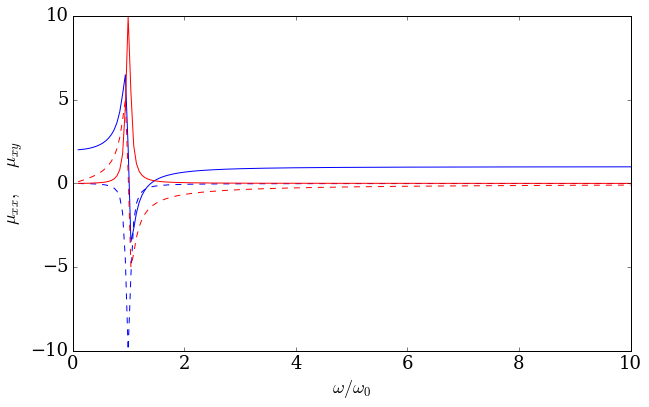

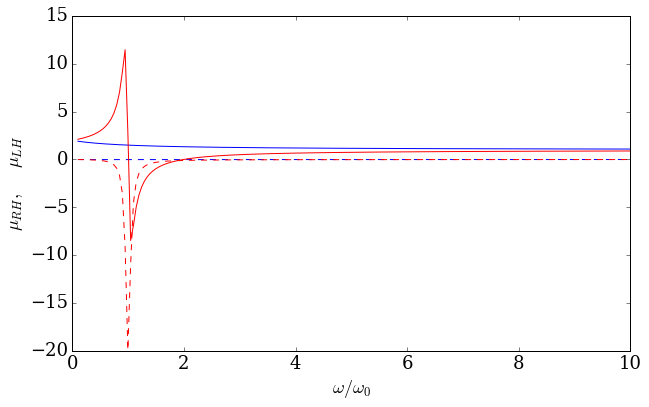

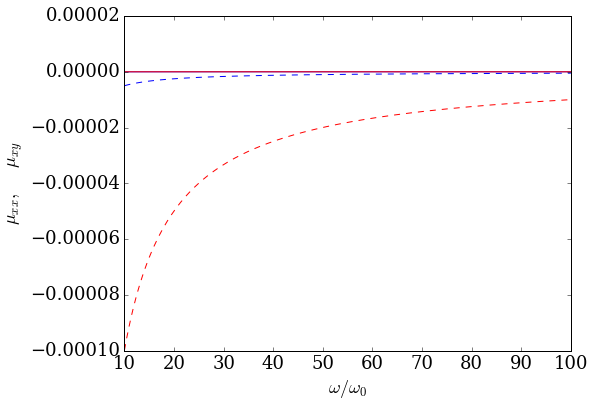

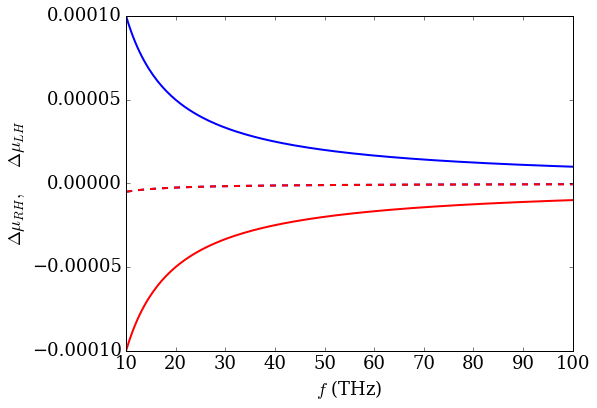

In [111]:
%reload_ext autoreload
%autoreload
%pylab inline

from scipy import constants
from Electromagnetics.solidstate import *
import numpy as np
import math

omega_0 = 2.0*math.pi*1.0*constants.giga
omega_m = 2.0*math.pi*1.0*constants.giga
alpha = 0.05
fm = FerriteMedia(omega_0=omega_0, alpha=alpha, omega_m=omega_m)

N = 200
omega = np.linspace(0.1*omega_0, 10.0*omega_0, N)

#mu_rh, mu_lh = fm.getRLHandedRelativePermeabilities(omega)
mu_xx, mu_xy = fm.getRelativePermeabilities(omega)

figsize(10, 6)
plot(omega/omega_0, np.real(mu_xx), 'b', omega/omega_0, np.imag(mu_xx), 'b--')
plot(omega/omega_0, np.real(mu_xy), 'r', omega/omega_0, np.imag(mu_xy), 'r--')
xlabel('$\\omega/\\omega_0$', fontsize=18)
ylabel('$\\mu_{xx},$    $\\mu_{xy}$', fontsize=18)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
matplotlib.rc('font', **font)
show()

mu_rh = mu_xx + 1.0j*mu_xy
mu_lh = mu_xx - 1.0j*mu_xy

figsize(10, 6)
plot(omega/omega_0, np.real(mu_rh), 'b', omega/omega_0, np.imag(mu_rh), 'b--')
plot(omega/omega_0, np.real(mu_lh), 'r', omega/omega_0, np.imag(mu_lh), 'r--')
xlabel('$\\omega/\\omega_0$', fontsize=18)
ylabel('$\\mu_{RH},$    $\\mu_{LH}$', fontsize=18)
show()

N = 200
f0, f1 = 10.0, 100.0
w0 = f0*constants.tera*2.0*math.pi
w1 = f1*constants.tera*2.0*math.pi
omega = np.linspace(w0, w1, N)

#mu_rh, mu_lh = fm.getRLHandedRelativePermeabilities(omega)
mu_xx, mu_xy = fm.getRelativePermeabilities(omega)

f = omega/(2.0*np.pi)/constants.tera

figsize(8, 6)
plot(f, np.real(mu_xx)-1, 'b', f, np.imag(mu_xx), 'b--')
plot(f, np.real(mu_xy), 'r', f, np.imag(mu_xy), 'r--')
xlabel('$\\omega/\\omega_0$', fontsize=18)
ylabel('$\\mu_{xx},$    $\\mu_{xy}$', fontsize=18)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
matplotlib.rc('font', **font)
show()

mu_rh = mu_xx + 1.0j*mu_xy
mu_lh = mu_xx - 1.0j*mu_xy

plot(f, np.real(mu_rh)-1, 'b', f, np.imag(mu_rh), 'b--', linewidth=2.0, label='RH')
plot(f, np.real(mu_lh)-1, 'r', f, np.imag(mu_lh), 'r--', linewidth=2.0, label='LH')
xlabel(r'$f$ (THz)', fontsize=18)
ylabel(r'$\Delta\mu_{RH},$    $\Delta\mu_{LH}$', fontsize=18)
show()


Modules to reload:


Modules to skip:

Populating the interactive namespace from numpy and matplotlib
Gyromagnetic ratio =  (176085970800.0, 's^-1 T^-1', 3900.0)
B_0 =  0.003568248667757912
mu_0*M_s =  0.003568248667757912
omega: 
 [ 285.88493148  285.96386597  286.04280045  286.12173494  286.20066943
  286.27960392  286.35853841  286.4374729   286.51640739  286.59534188
  286.67427636  286.75321085  286.83214534  286.91107983  286.99001432
  287.06894881  287.1478833   287.22681779  287.30575227  287.38468676
  287.46362125  287.54255574  287.62149023  287.70042472  287.77935921
  287.8582937   287.93722819  288.01616267  288.09509716  288.17403165
  288.25296614  288.33190063  288.41083512  288.48976961  288.5687041
  288.64763858  288.72657307  288.80550756  288.88444205  288.96337654
  289.04231103  289.12124552  289.20018001  289.27911449  289.35804898
  289.43698347  289.51591796  289.59485245  289.67378694  289.75272143
  289.83165592  289.9105904   289.98952489  290.06845938  2

`%matplotlib` prevents importing * from pylab and numpy
/usr/local/lib/python3.4/dist-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


    freq:  4.61281407035e+13
0    freq:  4.55e+13
f_m: 46.7311557789  f_p: 46.6683417085 df: -0.0628140703518


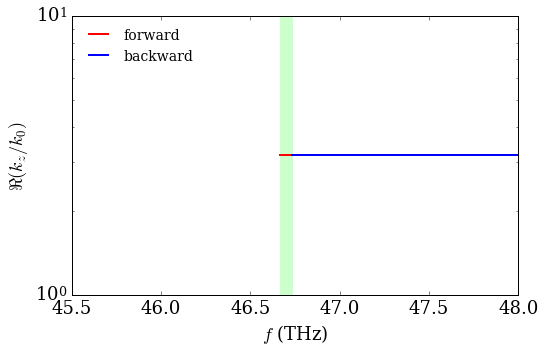

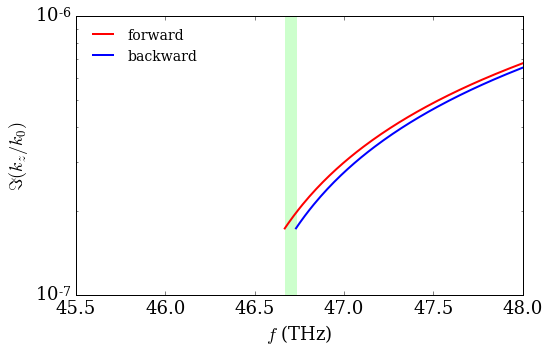

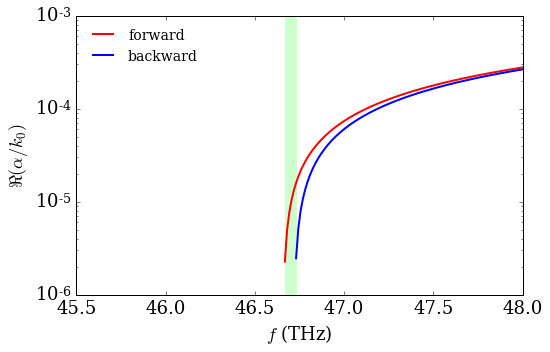

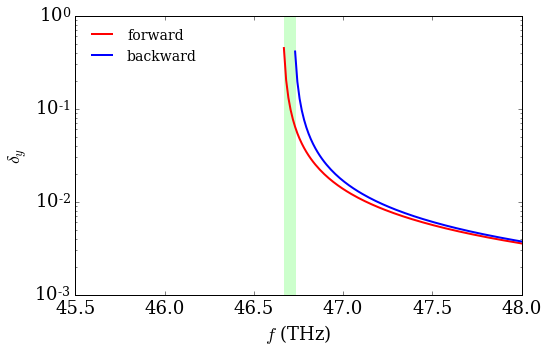

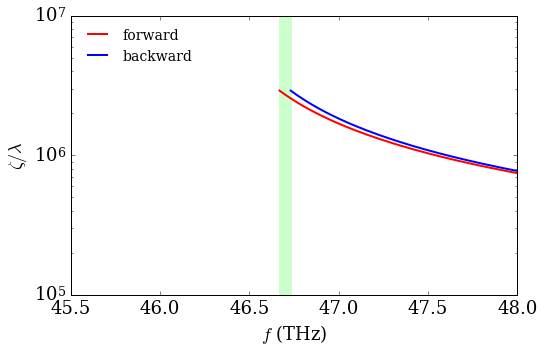

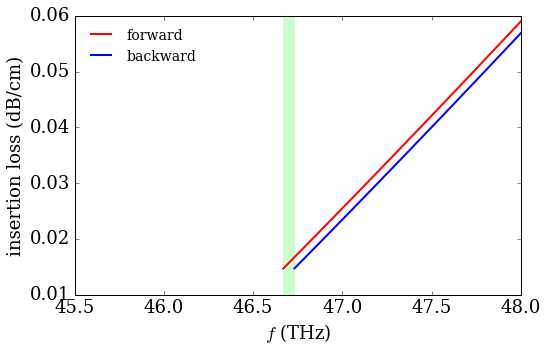

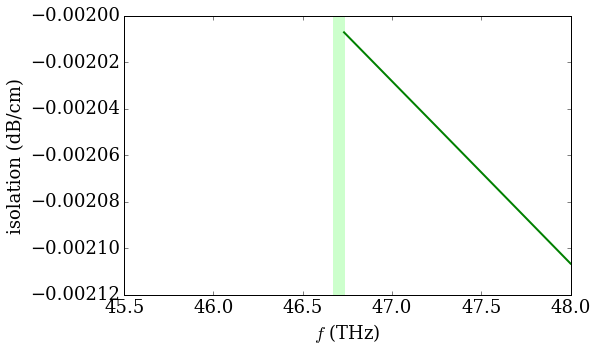

In [6]:
%reload_ext autoreload
%autoreload
%aimport
%pylab inline

from scipy import constants
from Electromagnetics.solidstate import *
import numpy as np
import math

from Electromagnetics.graphene import GrapheneOnFerriteSubstrate, plasmonDispersion_normalized, \
    plasmonDispersion_TE_normalized, GrapheneOnFerriteSubstrateSuperstrate
import matplotlib

vbose = False

f = 1.0*constants.tera
mu_c = 0.1*constants.eV
tau = 0.2*constants.pico
T = 300.001
eps_r1, mu_r1 = 10.0, 1.0
eps_r2 = 10.0

## _f_ :ferrite
omega_f_0 = 2.0*math.pi*0.1*constants.giga   #2.0*math.pi*50.0*constants.giga
omega_f_m = 2.0*math.pi*0.1*constants.giga   #2.0*math.pi*10.0*constants.giga
alpha_f = 0.05#0.05
fm = FerriteMedia(omega_0=omega_f_0, alpha=alpha_f, omega_m=omega_f_m)

grf = GrapheneOnFerriteSubstrateSuperstrate(fm)
grf.setFrequency(f)
grf.setTopMaterialParameters(eps_r1, mu_r1)
grf.setButtomMaterialParameters(eps_r2)
grf.setGrapheneSheetParameters( mu_c, tau, T)

f0, f1 = 45.5, 48.0
w0 = f0*constants.tera*2.0*math.pi
w1 = f1*constants.tera*2.0*math.pi
N = 200
grf.vbose = False
#omega = grf.findTEmodeOverFrequencyRange(w0, w1, N)
omega = np.linspace(w0, w1, N)
k_k0_plas_arr = plasmonDispersion_TE_normalized(mu_c=mu_c, omega=omega, tau=tau, T=T, 
                    eps_r1=eps_r1, mu_r1=mu_r1, eps_r2=eps_r2, mu_r2=1.0, cond='Kubo')

print('omega: \n', omega/constants.tera)
k_surf_p = np.zeros(len(omega), dtype=complex)
k_surf_m = np.zeros(len(omega), dtype=complex)
alpha_1_p = np.zeros(len(omega), dtype=complex)
alpha_2_p = np.zeros(len(omega), dtype=complex)
alpha_1_m = np.zeros(len(omega), dtype=complex)
alpha_2_m = np.zeros(len(omega), dtype=complex)
stop_p, stop_m = False, False

for i in range(len(omega)-1, -1, -1):
    f = omega[i]/(2.0*math.pi)
    grf.setFrequency(f)
    k0 = 2.0*math.pi*f/constants.c
    #print('k0 = ', k0)
    if vbose:
        print(i, "   freq: ",f)
    elif i%50==0:
        print(i, "   freq: ",f)
    
    mu_xx, mu_xy = fm.getRelativePermeabilities(omega=np.array([2.0*np.pi*f]))
    if vbose:
        print('mu_xx: ', mu_xx, ' mu_xy: ', mu_xy)
    mu_xx = np.real(mu_xx[0])

    k_k0_plas_ = k_k0_plas_arr[i]
    if vbose:
        print('k_k0_plas_ : ', k_k0_plas_ )


    if not stop_p:
        k_k0_init = k_k0_plas_
        if i<len(omega)-1:
            k_k0_init = k_surf_p[i+1]
        if  k_k0_init == 0.0:
            k_k0_init = k_k0_plas_

        res = grf.solveDispersion_alpha_k(f, k_k0_init=+k_k0_init, n_roots=2, n_max_iter=200, tol_y_rel=None, tol_y_abs=1.0e-10, solver='muller')
        if vbose:
            print('res: \n', res)
        if res[0]<=0.0 or res[2]<=0.0:
            stop_p = True
        roots = np.array([res[4]+1j*res[5]])
        alpha_1_p[i] = (res[0]+1j*res[1])*(res[0]>0.0)
        alpha_2_p[i] = (res[2]+1j*res[3])*(res[2]>0.0)
        
        #roots = np.array(res[0])
        if vbose:
            print('roots: \n', roots)
        a_ = +1.0
        roots_surface = (roots*((np.real(a_*roots)>0.999)*(np.imag(a_*roots)<0.0)*(np.abs(roots)<10.0)))
        roots_surface = np.ma.masked_equal(roots_surface, 0.0).compressed()
        if len(roots_surface>0):
            k_surf_p[i] = roots_surface[0]
        if vbose:
            print('roots_surface+: \n', roots_surface)
    
    if not stop_m:
        k_k0_init = -k_k0_plas_
        if i<len(omega)-1:
            k_k0_init = k_surf_m[i+1]
        if  k_k0_init == 0.0:
            k_k0_init = -k_k0_plas_

        res = grf.solveDispersion_alpha_k(f, k_k0_init=k_k0_init, n_roots=2, n_max_iter=200, tol_y_rel=None, tol_y_abs=1.0e-10, solver='muller')
        if vbose:
            print('res: \n', res)
        if res[0]<=0.0 or res[2]<=0.0:
            stop_m = True
        roots = np.array([res[4]+1j*res[5]])
        alpha_1_m[i] = (res[0]+1j*res[1])*(res[0]>0.0)
        alpha_2_m[i] = (res[2]+1j*res[3])*(res[2]>0.0)

        #roots = np.array(res[0])
        a_ = -1.0
        roots_surface = (roots*((np.real(a_*roots)>0.999)*(np.imag(a_*roots)<0.0)*(np.abs(roots)<10.0)))
        roots_surface = np.ma.masked_equal(roots_surface, 0.0).compressed()
        if len(roots_surface>0):
            k_surf_m[i] = roots_surface[0]
        if vbose:
            print('roots_surface-: \n', roots_surface)
    
#print('k_surf: ', k_surf)

import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'other', 'graphene-ferrite')
file_ext = '.eps'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

np.savez(os.path.join(dir_name, 'arrays.npz'), f0=f0, f1=f1, mu_c=mu_c, T=T, tau=tau, eps_r1=eps_r1, eps_r2=eps_r2, \
                        omega_f_0=omega_f_0, omega_f_m=omega_f_m, alpha_f=alpha_f, N=N, \
                        omega=omega, \
                        k_surf_p=k_surf_p, k_surf_m=k_surf_m,\
                        alpha_1_p=alpha_1_p, alpha_2_p=alpha_2_p, alpha_1_m=alpha_1_m, alpha_2_m=alpha_2_m)
    
    
mask_p = np.real(alpha_2_p)>0.0
mask_m = np.real(alpha_2_m)>0.0

k_surf_p = np.ma.masked_equal(k_surf_p*mask_p, 0)
k_surf_m = np.ma.masked_equal(k_surf_m*mask_m, 0)
alpha_1_p = np.ma.masked_equal(alpha_1_p,0)
alpha_2_p = np.ma.masked_equal(alpha_2_p,0)
alpha_1_m = np.ma.masked_equal(alpha_1_m,0)
alpha_2_m = np.ma.masked_equal(alpha_2_m,0)

f_p = omega[np.argmax(mask_p)]/(2.0*np.pi)/constants.tera
f_m = omega[np.argmax(mask_m)]/(2.0*np.pi)/constants.tera

print('f_m:', f_m, ' f_p:', f_p, 'df:',(f_p-f_m))

#loc='best'
loc='upper left'
rec_color = (0.8, 1.0, 0.8)
rec_alpha = 1.0

figsize(8, 5)
k_0 = omega*sqrt(constants.mu_0*constants.epsilon_0)

f = omega/(2.0*math.pi)
f /= constants.tera

plot(f, np.real(k_surf_p), 'r', linewidth=2, label='forward')
plot(f, -np.real(k_surf_m), 'b', linewidth=2, label='backward')
xlabel('$f$ (THz)', fontsize=18)
ylabel('$\\Re(k_z/k_0)$', fontsize=18)
yscale('log')
legend(loc=loc, fontsize=14, frameon=False)
#gca().yaxis.grid(True)
xlim([f0, f1])
#axvline(f_p, linestyle='--', color='k', linewidth=2)
#axvline(f_m, linestyle='--', color='k', linewidth=2)
y0, y1 = gca().get_ylim()
gca().add_patch(Rectangle((f_p, y0), width=f_m-f_p, height=y1-y0, color=rec_color, fill=True, alpha=rec_alpha))

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
matplotlib.rc('font', **font)

ax = gca()
#ax.ticklabel_format(axis='y', useOffset=False)

file_name = os.path.join(dir_name, 'k-k0-re'+file_ext)
savefig(file_name, bbox_inches='tight', pad_inches=0.5)

show()

plot(f, -np.imag(k_surf_p), 'r', linewidth=2, label='forward')
plot(f, np.imag(k_surf_m), 'b', linewidth=2, label='backward')
xlabel('$f$ (THz)', fontsize=18)
ylabel('$\\Im(k_z/k_0)$', fontsize=18)
yscale('log')
legend(loc=loc, fontsize=14, frameon=False)
#gca().yaxis.grid(True)
xlim([f0, f1])
#axvline(f_p, linestyle='--', color='k', linewidth=2)
#axvline(f_m, linestyle='--', color='k', linewidth=2)
y0, y1 = gca().get_ylim()
gca().add_patch(Rectangle((f_p, y0), width=f_m-f_p, height=y1-y0, color=rec_color, fill=True, alpha=rec_alpha))

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
matplotlib.rc('font', **font)

ax = gca()
#ax.ticklabel_format(axis='y', useOffset=False)

file_name = os.path.join(dir_name, 'k-k0-im'+file_ext)
savefig(file_name, bbox_inches='tight', pad_inches=0.5)

show()

#plot(f, np.real(alpha_1_p), 'r-.', linewidth=2, label='forward')
#plot(f, np.real(alpha_1_m), 'b-.', linewidth=2, label='backward')
plot(f, np.real(alpha_2_p), 'r', linewidth=2, label='forward')
plot(f, np.real(alpha_2_m), 'b', linewidth=2, label='backward')
xlabel('$f$ (THz)', fontsize=18)
ylabel('$\\Re(\\alpha/k_0)$', fontsize=18)
yscale('log')
legend(loc=loc, fontsize=14, frameon=False)
#gca().yaxis.grid(True)
xlim([f0, f1])
#axvline(f_p, linestyle='--', color='k', linewidth=2)
#axvline(f_m, linestyle='--', color='k', linewidth=2)
y0, y1 = gca().get_ylim()
gca().add_patch(Rectangle((f_p, y0), width=f_m-f_p, height=y1-y0, color=rec_color, fill=True, alpha=rec_alpha))
ylim([1.0e-6, y1])

ax = gca()
#ax.ticklabel_format(axis='y', useOffset=False)

file_name = os.path.join(dir_name, 'alpha-k0'+file_ext)
savefig(file_name, bbox_inches='tight', pad_inches=0.5)

show()

k_0 = omega/constants.c
#plot(f, 1/(np.real(alpha_1_p)*k_0), 'r-.', linewidth=2, label='forward')
#plot(f, 1/(np.real(alpha_1_m)*k_0), 'b-.', linewidth=2, label='backward')
plot(f, 1/(np.real(alpha_2_p)*k_0), 'r', linewidth=2, label='forward')
plot(f, 1/(np.real(alpha_2_m)*k_0), 'b', linewidth=2, label='backward')
xlabel('$f$ (THz)', fontsize=18)
ylabel('$\\delta_y$', fontsize=18)
yscale('log')
legend(loc=loc, fontsize=14, frameon=False)
#gca().yaxis.grid(True)
xlim([f0, f1])
#axvline(f_p, linestyle='--', color='k', linewidth=2)
#axvline(f_m, linestyle='--', color='k', linewidth=2)
y0, y1 = gca().get_ylim()
gca().add_patch(Rectangle((f_p, y0), width=f_m-f_p, height=y1-y0, color=rec_color, fill=True, alpha=rec_alpha))
ylim([y0, 1.0])

ax = gca()
#ax.ticklabel_format(axis='y', useOffset=False)

file_name = os.path.join(dir_name, 'delta-y'+file_ext)
savefig(file_name, bbox_inches='tight', pad_inches=0.5)

show()

plot(f, -1.0/(np.imag(k_surf_p)*k_0)/(2.0*math.pi/(np.real(k_surf_p)*k_0)), 'r', linewidth=2, label='forward')
plot(f, -1.0/(np.imag(k_surf_m)*k_0)/(2.0*math.pi/(np.real(k_surf_m)*k_0)), 'b', linewidth=2, label='backward')
xlabel('$f$ (THz)', fontsize=18)
ylabel('$\\zeta/\\lambda$', fontsize=18)
yscale('log')
legend(loc=loc, fontsize=14, frameon=False)
#gca().yaxis.grid(True)
xlim([f0, f1])
#axvline(f_p, linestyle='--', color='k', linewidth=2)
#axvline(f_m, linestyle='--', color='k', linewidth=2)
y0, y1 = gca().get_ylim()
gca().add_patch(Rectangle((f_p, y0), width=f_m-f_p, height=y1-y0, color=rec_color, fill=True, alpha=rec_alpha))

ax = gca()
#ax.ticklabel_format(axis='y', useOffset=False)

file_name = os.path.join(dir_name, 'prop-length'+file_ext)
savefig(file_name, bbox_inches='tight', pad_inches=0.5)

show()

plot(f, 20.0*math.log10(math.exp(1.0))*(-np.imag(k_surf_p)*k_0*constants.centi), 'r', linewidth=2, label='forward')
plot(f, 20.0*math.log10(math.exp(1.0))*(np.imag(k_surf_m)*k_0*constants.centi), 'b', linewidth=2, label='backward')
xlabel('$f$ (THz)', fontsize=18)
ylabel('insertion loss (dB/cm)', fontsize=18)
#yscale('log')
legend(loc=loc, fontsize=14, frameon=False)
#gca().yaxis.grid(True)
xlim([f0, f1])
#axvline(f_p, linestyle='--', color='k', linewidth=2)
#axvline(f_m, linestyle='--', color='k', linewidth=2)
y0, y1 = gca().get_ylim()
gca().add_patch(Rectangle((f_p, y0), width=f_m-f_p, height=y1-y0, color=rec_color, fill=True, alpha=rec_alpha))

ax = gca()
ax.ticklabel_format(axis='y', useOffset=False)

file_name = os.path.join(dir_name, 'insertion-loss'+file_ext)
savefig(file_name, bbox_inches='tight', pad_inches=0.5)

show()


plot(f, 20.0*math.log10(math.exp(1.0))*((np.imag(k_surf_m)+np.imag(k_surf_p))*k_0*constants.centi), 'g', linewidth=2)

xlabel('$f$ (THz)', fontsize=18)
ylabel('isolation (dB/cm)', fontsize=18)
#yscale('log')
#legend(loc=loc, fontsize=14, frameon=False)
#gca().yaxis.grid(True)
xlim([f0, f1])
#axvline(f_p, linestyle='--', color='k', linewidth=2)
#axvline(f_m, linestyle='--', color='k', linewidth=2)
y0, y1 = gca().get_ylim()
gca().add_patch(Rectangle((f_p, y0), width=f_m-f_p, height=y1-y0, color=rec_color, fill=True, alpha=rec_alpha))

ax = gca()
ax.ticklabel_format(axis='y', useOffset=False)


file_name = os.path.join(dir_name, 'isolation'+file_ext)
savefig(file_name, bbox_inches='tight', pad_inches=0.5)

show()


### Reading files

Populating the interactive namespace from numpy and matplotlib


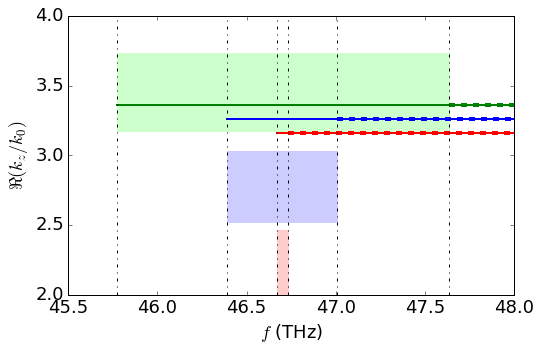

/usr/local/lib/python3.4/dist-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


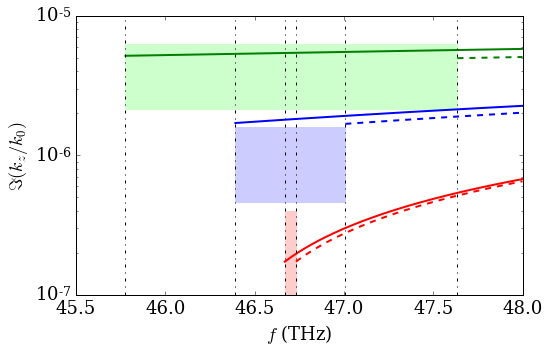

/usr/local/lib/python3.4/dist-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


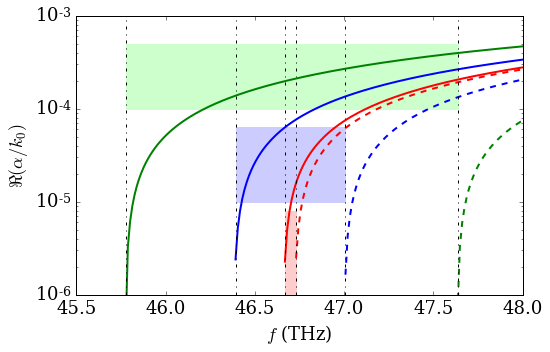

/usr/local/lib/python3.4/dist-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


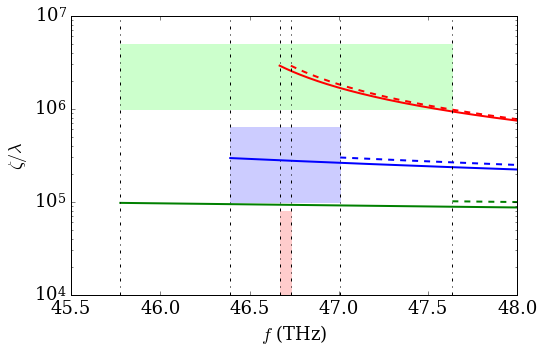

In [1]:
%pylab inline

from scipy import constants
import numpy as np
import math

import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'other', 'graphene-ferrite')
file_ext = '.eps'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

files_npz = []
import os
for file in os.listdir(dir_name):
    if file.endswith(".npz"):
        files_npz.append(file)

files_npz = sorted(files_npz, reverse=False)
n_file = len(files_npz)
f_band = []
colors = ['r', 'b', 'g']
rec_colors = [(1.0, 0.8, 0.8), (0.8, 0.8, 1.0), (0.8, 1.0, 0.8)]

## Re(kz)
for ind, file in enumerate(files_npz):
    file_B = np.load(os.path.join(dir_name, file))
    f0 = file_B['f0']
    f1 = file_B['f1']
    omega = file_B['omega']
    k_surf_p = file_B['k_surf_p']
    k_surf_m = file_B['k_surf_m']
    alpha_1_p = file_B['alpha_1_p']
    alpha_2_p = file_B['alpha_2_p']
    alpha_1_m = file_B['alpha_1_m']
    alpha_2_m = file_B['alpha_2_m']

    mask_p = np.real(alpha_2_p)>0.0
    mask_m = np.real(alpha_2_m)>0.0

    k_surf_p = np.ma.masked_equal(k_surf_p*mask_p, 0)
    k_surf_m = np.ma.masked_equal(k_surf_m*mask_m, 0)
    alpha_1_p = np.ma.masked_equal(alpha_1_p,0)
    alpha_2_p = np.ma.masked_equal(alpha_2_p,0)
    alpha_1_m = np.ma.masked_equal(alpha_1_m,0)
    alpha_2_m = np.ma.masked_equal(alpha_2_m,0)

    f_p = omega[np.argmax(mask_p)]/(2.0*np.pi)/constants.tera
    f_m = omega[np.argmax(mask_m)]/(2.0*np.pi)/constants.tera

    f_band.append([f_m, f_p])

    #loc='best'
    loc='upper left'

    figsize(8, 5)
    k_0 = omega*sqrt(constants.mu_0*constants.epsilon_0)

    f = omega/(2.0*math.pi)
    f /= constants.tera

    plot(f, np.real(k_surf_p)+0.1*ind, colors[ind], linewidth=2, label='forward')
    plot(f, -np.real(k_surf_m)+0.1*ind, colors[ind]+'--', linewidth=4, label='backward')
    xlabel('$f$ (THz)', fontsize=18)
    ylabel('$\\Re(k_z/k_0)$', fontsize=18)
    #yscale('log')
    #legend(loc=loc, fontsize=14, frameon=False)
    #gca().yaxis.grid(True)
    xlim([f0, f1])
    axvline(f_p, linestyle='-.', color='k', linewidth=1)
    axvline(f_m, linestyle='-.', color='k', linewidth=1)
    ylim([2.0, 4.0])

    ax = gca()
    #ax.ticklabel_format(axis='y', useOffset=False)

    font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
    matplotlib.rc('font', **font)

for ind, file in enumerate(files_npz):
    [f_m, f_p] = f_band[ind]

    rec_color = rec_colors[ind]
    rec_alpha = 1.0

    y0, y1 = gca().get_ylim()
    dh = (np.log10(y1)-np.log10(y0))/n_file
    y0_ = 10.0**(np.log10(y0) + dh*ind)
    y1_ = 10.0**(np.log10(y0) + 0.9*dh*(ind+1))    
    gca().add_patch(Rectangle((f_p, y0_), width=f_m-f_p, height=y1_-y0_, color=rec_color, fill=True, alpha=rec_alpha))

file_name = os.path.join(dir_name, 'k-k0-re'+file_ext)
savefig(file_name, bbox_inches='tight', pad_inches=0.5)

show()



## Im(kz)
for ind, file in enumerate(files_npz):
    file_B = np.load(os.path.join(dir_name, file))
    f0 = file_B['f0']
    f1 = file_B['f1']
    omega = file_B['omega']
    k_surf_p = file_B['k_surf_p']
    k_surf_m = file_B['k_surf_m']
    alpha_1_p = file_B['alpha_1_p']
    alpha_2_p = file_B['alpha_2_p']
    alpha_1_m = file_B['alpha_1_m']
    alpha_2_m = file_B['alpha_2_m']

    mask_p = np.real(alpha_2_p)>0.0
    mask_m = np.real(alpha_2_m)>0.0

    k_surf_p = np.ma.masked_equal(k_surf_p*mask_p, 0)
    k_surf_m = np.ma.masked_equal(k_surf_m*mask_m, 0)
    alpha_1_p = np.ma.masked_equal(alpha_1_p,0)
    alpha_2_p = np.ma.masked_equal(alpha_2_p,0)
    alpha_1_m = np.ma.masked_equal(alpha_1_m,0)
    alpha_2_m = np.ma.masked_equal(alpha_2_m,0)

    f_p = omega[np.argmax(mask_p)]/(2.0*np.pi)/constants.tera
    f_m = omega[np.argmax(mask_m)]/(2.0*np.pi)/constants.tera

    f_band.append([f_m, f_p])

    #loc='best'
    loc='upper left'

    figsize(8, 5)
    k_0 = omega*sqrt(constants.mu_0*constants.epsilon_0)

    f = omega/(2.0*math.pi)
    f /= constants.tera

    plot(f, -np.imag(k_surf_p), colors[ind], linewidth=2, label='forward')
    plot(f, np.imag(k_surf_m), colors[ind]+'--', linewidth=2, label='backward')
    xlabel('$f$ (THz)', fontsize=18)
    ylabel('$\\Im(k_z/k_0)$', fontsize=18)
    yscale('log')
    #legend(loc=loc, fontsize=14, frameon=False)
    #gca().yaxis.grid(True)
    xlim([f0, f1])
    axvline(f_p, linestyle='-.', color='k', linewidth=1)
    axvline(f_m, linestyle='-.', color='k', linewidth=1)
    #ylim([1.0e-6, y1])

    ax = gca()
    #ax.ticklabel_format(axis='y', useOffset=False)

    font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
    matplotlib.rc('font', **font)

for ind, file in enumerate(files_npz):
    [f_m, f_p] = f_band[ind]

    rec_color = rec_colors[ind]
    rec_alpha = 1.0

    y0, y1 = gca().get_ylim()
    dh = (np.log10(y1)-np.log10(y0))/n_file
    y0_ = 10.0**(np.log10(y0) + dh*ind)
    y1_ = 10.0**(np.log10(y0) + 0.9*dh*(ind+1))    
    gca().add_patch(Rectangle((f_p, y0_), width=f_m-f_p, height=y1_-y0_, color=rec_color, fill=True, alpha=rec_alpha))

file_name = os.path.join(dir_name, 'k-k0-im'+file_ext)
savefig(file_name, bbox_inches='tight', pad_inches=0.5)

show()


##alpha_p
for ind, file in enumerate(files_npz):
    file_B = np.load(os.path.join(dir_name, file))
    f0 = file_B['f0']
    f1 = file_B['f1']
    omega = file_B['omega']
    k_surf_p = file_B['k_surf_p']
    k_surf_m = file_B['k_surf_m']
    alpha_1_p = file_B['alpha_1_p']
    alpha_2_p = file_B['alpha_2_p']
    alpha_1_m = file_B['alpha_1_m']
    alpha_2_m = file_B['alpha_2_m']

    mask_p = np.real(alpha_2_p)>0.0
    mask_m = np.real(alpha_2_m)>0.0

    k_surf_p = np.ma.masked_equal(k_surf_p*mask_p, 0)
    k_surf_m = np.ma.masked_equal(k_surf_m*mask_m, 0)
    alpha_1_p = np.ma.masked_equal(alpha_1_p,0)
    alpha_2_p = np.ma.masked_equal(alpha_2_p,0)
    alpha_1_m = np.ma.masked_equal(alpha_1_m,0)
    alpha_2_m = np.ma.masked_equal(alpha_2_m,0)

    f_p = omega[np.argmax(mask_p)]/(2.0*np.pi)/constants.tera
    f_m = omega[np.argmax(mask_m)]/(2.0*np.pi)/constants.tera

    f_band.append([f_m, f_p])

    #loc='best'
    loc='upper left'

    figsize(8, 5)
    k_0 = omega*sqrt(constants.mu_0*constants.epsilon_0)

    f = omega/(2.0*math.pi)
    f /= constants.tera

    #plot(f, np.real(alpha_1_p), 'r-.', linewidth=2, label='forward')
    #plot(f, np.real(alpha_1_m), 'b-.', linewidth=2, label='backward')
    plot(f, np.real(alpha_2_p), colors[ind], linewidth=2, label='forward')
    plot(f, np.real(alpha_2_m), colors[ind]+'--', linewidth=2, label='backward')
    xlabel('$f$ (THz)', fontsize=18)
    ylabel('$\\Re(\\alpha/k_0)$', fontsize=18)
    yscale('log')
    #legend(loc=loc, fontsize=14, frameon=False)
    #gca().yaxis.grid(True)
    xlim([f0, f1])
    axvline(f_p, linestyle='-.', color='k', linewidth=1)
    axvline(f_m, linestyle='-.', color='k', linewidth=1)
    y0, y1 = gca().get_ylim()
    ylim([1.0e-6, y1])

    ax = gca()
    #ax.ticklabel_format(axis='y', useOffset=False)

    font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
    matplotlib.rc('font', **font)

for ind, file in enumerate(files_npz):
    [f_m, f_p] = f_band[ind]

    rec_color = rec_colors[ind]
    rec_alpha = 1.0

    y0, y1 = gca().get_ylim()
    dh = (np.log10(y1)-np.log10(y0))/n_file
    y0_ = 10.0**(np.log10(y0) + dh*ind)
    y1_ = 10.0**(np.log10(y0) + 0.9*dh*(ind+1))    
    gca().add_patch(Rectangle((f_p, y0_), width=f_m-f_p, height=y1_-y0_, color=rec_color, fill=True, alpha=rec_alpha))

file_name = os.path.join(dir_name, 'alpha-k0'+file_ext)
savefig(file_name, bbox_inches='tight', pad_inches=0.5)
    
show()




##zeta propagation length
for ind, file in enumerate(files_npz):
    file_B = np.load(os.path.join(dir_name, file))
    f0 = file_B['f0']
    f1 = file_B['f1']
    omega = file_B['omega']
    k_surf_p = file_B['k_surf_p']
    k_surf_m = file_B['k_surf_m']
    alpha_1_p = file_B['alpha_1_p']
    alpha_2_p = file_B['alpha_2_p']
    alpha_1_m = file_B['alpha_1_m']
    alpha_2_m = file_B['alpha_2_m']

    mask_p = np.real(alpha_2_p)>0.0
    mask_m = np.real(alpha_2_m)>0.0

    k_surf_p = np.ma.masked_equal(k_surf_p*mask_p, 0)
    k_surf_m = np.ma.masked_equal(k_surf_m*mask_m, 0)
    alpha_1_p = np.ma.masked_equal(alpha_1_p,0)
    alpha_2_p = np.ma.masked_equal(alpha_2_p,0)
    alpha_1_m = np.ma.masked_equal(alpha_1_m,0)
    alpha_2_m = np.ma.masked_equal(alpha_2_m,0)

    f_p = omega[np.argmax(mask_p)]/(2.0*np.pi)/constants.tera
    f_m = omega[np.argmax(mask_m)]/(2.0*np.pi)/constants.tera

    f_band.append([f_m, f_p])

    #loc='best'
    loc='upper left'

    figsize(8, 5)
    k_0 = omega*sqrt(constants.mu_0*constants.epsilon_0)

    f = omega/(2.0*math.pi)
    f /= constants.tera

    plot(f, -1.0/(np.imag(k_surf_p)*k_0)/(2.0*math.pi/(np.real(k_surf_p)*k_0)), colors[ind], linewidth=2, label='forward')
    plot(f, -1.0/(np.imag(k_surf_m)*k_0)/(2.0*math.pi/(np.real(k_surf_m)*k_0)), colors[ind]+'--', linewidth=2, label='backward')
    xlabel('$f$ (THz)', fontsize=18)
    ylabel('$\\zeta/\\lambda$', fontsize=18)
    yscale('log')
    #legend(loc=loc, fontsize=14, frameon=False)
    #gca().yaxis.grid(True)
    xlim([f0, f1])
    axvline(f_p, linestyle='-.', color='k', linewidth=1)
    axvline(f_m, linestyle='-.', color='k', linewidth=1)
    y0, y1 = gca().get_ylim()

    ax = gca()
    #ax.ticklabel_format(axis='y', useOffset=False)

    font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
    matplotlib.rc('font', **font)

for ind, file in enumerate(files_npz):
    [f_m, f_p] = f_band[ind]

    rec_color = rec_colors[ind]
    rec_alpha = 1.0

    y0, y1 = gca().get_ylim()
    dh = (np.log10(y1)-np.log10(y0))/n_file
    y0_ = 10.0**(np.log10(y0) + dh*ind)
    y1_ = 10.0**(np.log10(y0) + 0.9*dh*(ind+1))    
    gca().add_patch(Rectangle((f_p, y0_), width=f_m-f_p, height=y1_-y0_, color=rec_color, fill=True, alpha=rec_alpha))

file_name = os.path.join(dir_name, 'prop-length'+file_ext)
savefig(file_name, bbox_inches='tight', pad_inches=0.5)

show()





### TE mode sensitivity

Populating the interactive namespace from numpy and matplotlib
46.7669172932
53.5338345865

`%matplotlib` prevents importing * from pylab and numpy
/usr/local/lib/python3.4/dist-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


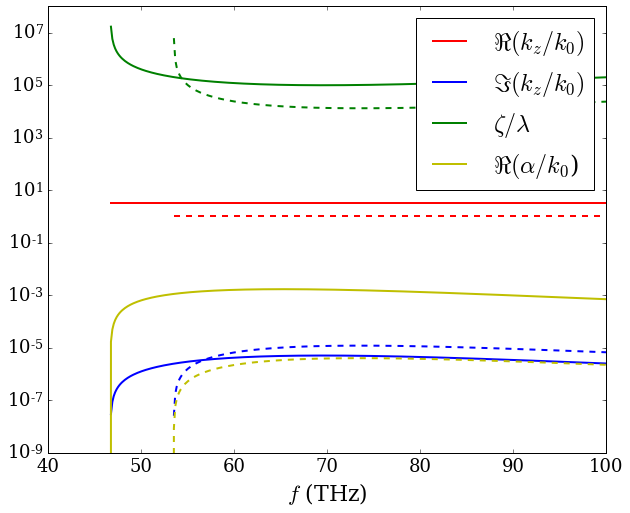

In [2]:
## TE mode dielectric sensitivity

%pylab inline 

from scipy import constants
import numpy as np
import math
from Electromagnetics.graphene import *

N = 400
f0 = 40.0*constants.tera
f1 = 100.0*constants.tera
f = np.linspace(f0, f1, N)
omega = 2.0*math.pi*f

tau = 0.2*constants.pico
mu_c = 0.1*constants.eV
T = 300.001
B_0 = 0.0
eps_r1, mu_r1 = 10.0, 1.0
eps_mu_2 = [[10.0, 1.0], [10.0001, 1.00001]]#, [10.0001, 1.00002]]
ls = ['', '--']

figsize(10, 8)
x_axis = 'f'#'eV'

for ind in range(len(eps_mu_2)):
    eps_r2, mu_r2 = eps_mu_2[ind]
    k_k0_p = None

    k_k0_p = plasmonDispersion_TE_normalized(mu_c, omega, tau, T, cond='Kubo', eps_r1=eps_r1, mu_r1=mu_r1, 
            eps_r2=eps_r2, mu_r2=mu_r2)
    k_k0_p *= (np.imag(k_k0_p)<=0.0)

    alpha1_k0_p = np.sqrt(k_k0_p**2 - eps_r1*mu_r1)
    alpha2_k0_p = np.sqrt(k_k0_p**2 - eps_r2*mu_r2)

    font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
    matplotlib.rc('font', **font)

    mask_p = np.logical_or(np.real(alpha1_k0_p)>0.0, np.real(alpha2_k0_p)>0.0)

    k_k0_p = np.ma.masked_equal(k_k0_p*mask_p, 0)
    alpha1_k0_p = np.ma.masked_equal(alpha1_k0_p, 0)
    alpha2_k0_p = np.ma.masked_equal(alpha2_k0_p, 0)

    f_p = f[np.argmax(mask_p)]/constants.tera
    print(f_p)
    
    if x_axis=='eV':
        omega_ev = 2.0*pi*f*constants.hbar/constants.e
    else:
        omega_ev = f/constants.tera

    plot(omega_ev, np.real(k_k0_p), 'r'+ls[ind], label='$\\Re(k_z/k_0)$', linewidth=2)
    plot(omega_ev, -np.imag(k_k0_p), 'b'+ls[ind], label='$\\Im(k_z/k_0)$', linewidth=2)
    plot(omega_ev, -np.real(k_k0_p)/(2.0*np.pi*np.imag(k_k0_p)), 'g'+ls[ind], label='$\\zeta/\\lambda$', linewidth=2)
    #plot(omega_ev, -1.0/(2.0*np.pi*np.imag(k_k0_p)), 'g'+ls[ind], label='$\\zeta/\\lambda$', linewidth=2)
    plot(omega_ev, np.real(alpha1_k0_p), 'y'+ls[ind], label='$\\Re(\\alpha/k_0$)', linewidth=2)
    #plot(omega_ev, np.real(alpha2_k0_p), 'y'+ls[ind], label='$\\Re(\\alpha/k_0$)', linewidth=2)
    if x_axis=='eV':
        xlabel('$\\omega$ (eV)', fontsize=22)
    else:
        xlabel('$f$ (THz)', fontsize=22)

    #axvline(f_p, linestyle='-.', color='k', linewidth=2)
    
    if ind==0:
        legend(loc='upper right', fontsize=24, frameon=True)

    if not np.all(k_k0_p==0.0):
        yscale('log')

import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'other', 'graphene-ferrite')
file_ext = '.eps'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)
    
file_name = os.path.join(dir_name, 'TE-disp-sensitivity'+file_ext)
savefig(file_name, bbox_inches='tight', pad_inches=0.5)

show()



In [95]:
## TE mode dielectric sensitivity

%pylab inline 

from scipy import constants
import numpy as np
import math
from Electromagnetics.graphene import *
import time

t_start = time.perf_counter()

N = 100
f0 = 10.0*constants.tera
f1 = 400.0*constants.tera
f = np.linspace(f0, f1, N)
omega = 2.0*math.pi*f

tau = 0.2*constants.pico
mu_c = 0.1*constants.eV
T = 300.001
B_0 = 0.0
eps_r1, mu_r1 = 10.0, 1.0

d_eps = 1.0e-3
d_mu = 2.0e-4

eps_r2_arr = linspace(eps_r1-d_eps, eps_r1+d_eps, 101)
mu_r2_arr = linspace(mu_r1-d_mu, mu_r1+d_mu, 101)

eps_r2_mg, mu_r2_mg = np.meshgrid(eps_r2_arr, mu_r2_arr, indexing='ij')

shape = eps_r2_mg.shape
Z = np.zeros(shape)

for i in range(shape[0]):
    for j in range(shape[1]):
        eps_r2, mu_r2 = eps_r2_mg[i, j], mu_r2_mg[i, j]
        k_k0_p = None

        k_k0_p = plasmonDispersion_TE_normalized(mu_c, omega, tau, T, cond='Kubo', eps_r1=eps_r1, mu_r1=mu_r1, 
                eps_r2=eps_r2, mu_r2=mu_r2)
        k_k0_p *= (np.imag(k_k0_p)<=0.0)

        if np.any(k_k0_p!=0.0):
            Z[i, j] = 1.0
    print('{}/{}'.format(i, shape[0]), end=' ')
    t_i = time.perf_counter()
    dt_i = int((t_i-t_start)/60)
    print('{}"'.format(dt_i), end=' ')



Populating the interactive namespace from numpy and matplotlib
0/101 2" 1/101 5" 2/101 8" 3/101 11" 4/101 15" 5/101 18" 6/101 21" 7/101 24" 8/101 27" 9/101 30" 10/101 33" 11/101 37" 12/101 40" 13/101 43" 14/101 46" 15/101 49" 16/101 52" 17/101 56" 18/101 59" 19/101 62" 20/101 65" 21/101 68" 22/101 71" 23/101 75" 24/101 78" 25/101 81" 26/101 84" 27/101 87" 28/101 90" 29/101 94" 30/101 97" 31/101 100" 32/101 103" 33/101 106" 34/101 109" 35/101 112" 36/101 116" 37/101 119" 38/101 122" 39/101 125" 40/101 128" 41/101 131" 42/101 134" 43/101 138" 44/101 141" 45/101 144" 46/101 147" 47/101 150" 48/101 153" 49/101 157" 50/101 160" 51/101 163" 52/101 166" 53/101 169" 54/101 172" 55/101 175" 56/101 179" 57/101 182" 58/101 185" 59/101 188" 60/101 191" 61/101 194" 62/101 197" 63/101 201" 64/101 204" 65/101 207" 66/101 210" 67/101 213" 68/101 216" 69/101 220" 70/101 223" 71/101 226" 72/101 229" 73/101 232" 74/101 235" 75/101 238" 76/101 242" 77/101 245" 78/101 248" 79/101 251" 80/101 254" 81/101 25

`%matplotlib` prevents importing * from pylab and numpy


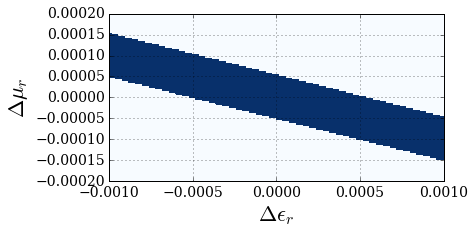

In [106]:

figsize(6, 3)
pcolor(eps_r2_mg-eps_r1, mu_r2_mg-mu_r1, Z, cmap=cm.Blues)
axis([np.min(eps_r2_arr)-eps_r1, np.max(eps_r2_arr)-eps_r1, np.min(mu_r2_arr)-mu_r1, np.max(mu_r2_arr)-mu_r1])
#colorbar()
#gca().ticklabel_format(axis='x', useOffset=False)
font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 14}
matplotlib.rc('font', **font)
#xscale('log')
#yscale('log')

xlabel(r'$\Delta\epsilon_r$', fontsize=22)
ylabel(r'$\Delta\mu_r$', fontsize=22)
grid()

import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'other', 'graphene-ferrite')
file_ext = '.eps'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)
    
file_name = os.path.join(dir_name, 'TE-depsdmu-region'+file_ext)
savefig(file_name, bbox_inches='tight', pad_inches=0.5)

show()
